In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/CI/cleaned_solar_data.csv", parse_dates=['Date-Hour(NMT)'], index_col='Date-Hour(NMT)')
df['SystemProduction'] = df['SystemProduction'] / 1000.0
print("New Max Output (kWh):", df['SystemProduction'].max())

# Save it so you never have to worry about it again
df.to_csv("/content/drive/MyDrive/CI/cleaned_solar_data.csv", index=True)

New Max Output (kWh): 7.701


--- STEP 1: LOADING DATA ---

--- STEP 2: TRAINING THE BRAIN ---
>> Training Complete.
>> Saving model to disk...
>> Saved successfully as 'solar_brain_model.pkl' and 'weather_scaler.pkl'

--- STEP 3: EVALUATION REPORT ---
1. R-Squared Score (R2):  0.8290
2. Mean Abs Error (MAE):  0.3225 kWh
3. Root Mean Sq Error:    0.5817 kWh


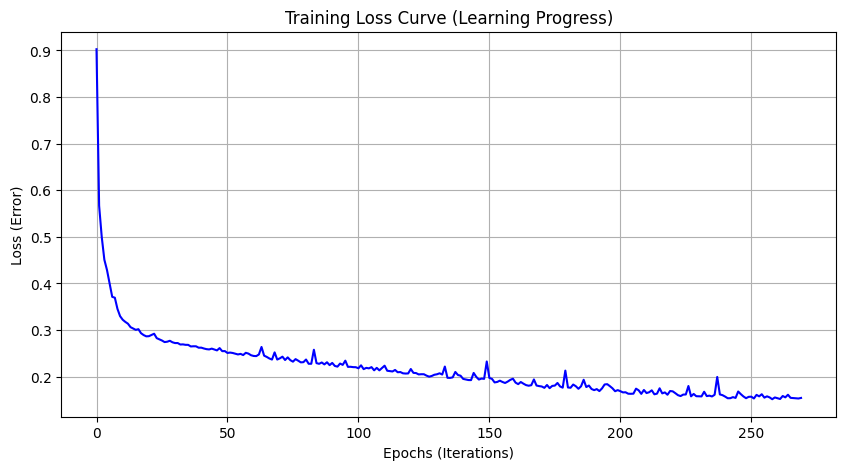

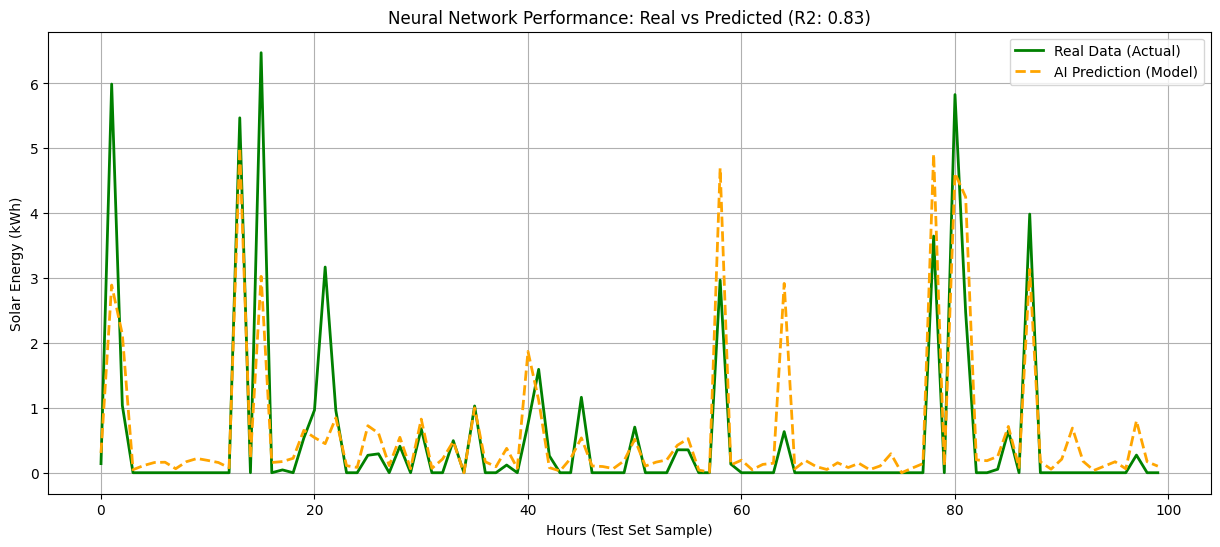

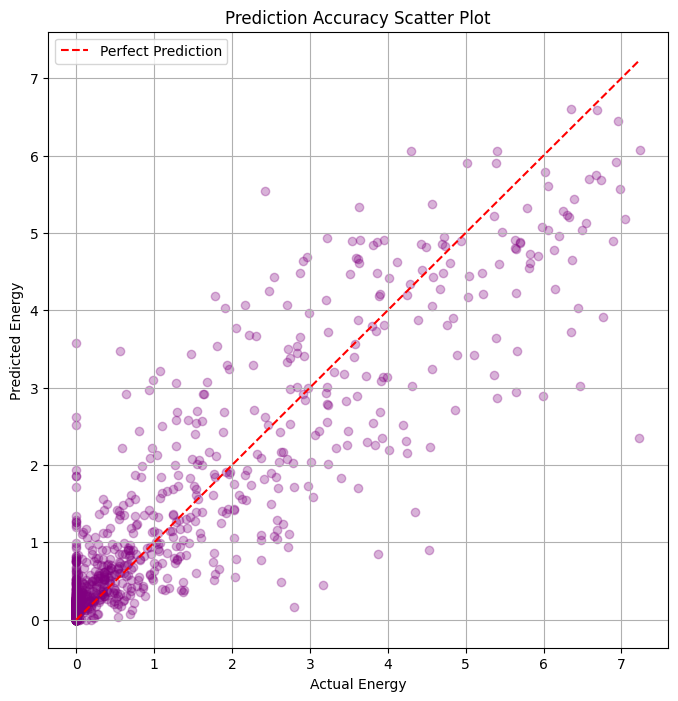

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import joblib  # <--- Added for saving

# ==========================================
# 1. LOAD & PREPARE DATA
# ==========================================
print("--- STEP 1: LOADING DATA ---")
df = pd.read_csv("/content/drive/MyDrive/CI/cleaned_solar_data.csv", parse_dates=['Date-Hour(NMT)'], index_col='Date-Hour(NMT)')

features = ['AirTemperature', 'RelativeAirHumidity', 'WindSpeed', 'Hour', 'Month']
target = 'SystemProduction'

X = df[features].values
y = df[target].values

# ==========================================
# 2. SPLIT & SCALE
# ==========================================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ==========================================
# 3. TRAIN THE NEURAL NETWORK
# ==========================================
print("\n--- STEP 2: TRAINING THE BRAIN ---")
model = MLPRegressor(hidden_layer_sizes=(100, 50),
                     activation='relu',
                     solver='adam',
                     max_iter=1000,
                     random_state=42)

# Training happens here
model.fit(X_train_scaled, y_train)
print(">> Training Complete.")

# --- SAVE THE MODEL AND SCALER ---
print(">> Saving model to disk...")
joblib.dump(model, '/content/drive/MyDrive/CI/solar_brain_model.pkl')
joblib.dump(scaler, '/content/drive/MyDrive/CI/weather_scaler.pkl')
print(">> Saved successfully as 'solar_brain_model.pkl' and 'weather_scaler.pkl'")

# ==========================================
# 4. EVALUATION & VISUALIZATION
# ==========================================
print("\n--- STEP 3: EVALUATION REPORT ---")

y_pred = model.predict(X_test_scaled)
y_pred = np.maximum(y_pred, 0)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"1. R-Squared Score (R2):  {r2:.4f}")
print(f"2. Mean Abs Error (MAE):  {mae:.4f} kWh")
print(f"3. Root Mean Sq Error:    {rmse:.4f} kWh")

# --- VISUALIZATION 1: EPOCH LOSS CURVE ---
# This shows how the model learned over time
plt.figure(figsize=(10, 5))

plt.plot(model.loss_curve_, color='blue')
plt.title("Training Loss Curve (Learning Progress)")
plt.xlabel("Epochs (Iterations)")
plt.ylabel("Loss (Error)")
plt.grid(True)
plt.show()

# --- VISUALIZATION 2: ACTUAL VS PREDICTED ---
plt.figure(figsize=(15, 6))
limit = 100
plt.plot(range(limit), y_test[:limit], label='Real Data (Actual)', color='green', linewidth=2)
plt.plot(range(limit), y_pred[:limit], label='AI Prediction (Model)', color='orange', linestyle='--', linewidth=2)
plt.title(f"Neural Network Performance: Real vs Predicted (R2: {r2:.2f})")
plt.xlabel("Hours (Test Set Sample)")
plt.ylabel("Solar Energy (kWh)")
plt.legend()
plt.grid(True)
plt.show()

# --- VISUALIZATION 3: SCATTER PLOT ---
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.3, color='purple')
plt.plot([0, y_test.max()], [0, y_test.max()], 'r--', label='Perfect Prediction')
plt.title("Prediction Accuracy Scatter Plot")
plt.xlabel("Actual Energy")
plt.ylabel("Predicted Energy")
plt.legend()
plt.grid(True)
plt.show()

In [2]:
pip install pygad

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.6/89.6 kB 3.7 MB/s eta 0:00:00


In [3]:
!pip install pymoo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.7/72.7 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 56.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.5/309.5 kB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 786.8/786.8 kB 41.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 4.0 MB/s eta 0:00:00


[Init] Model and Scaler loaded successfully.

--- PHASE 1: MODEL DIAGNOSTICS ---
>> Model Accuracy (R2): 0.8290


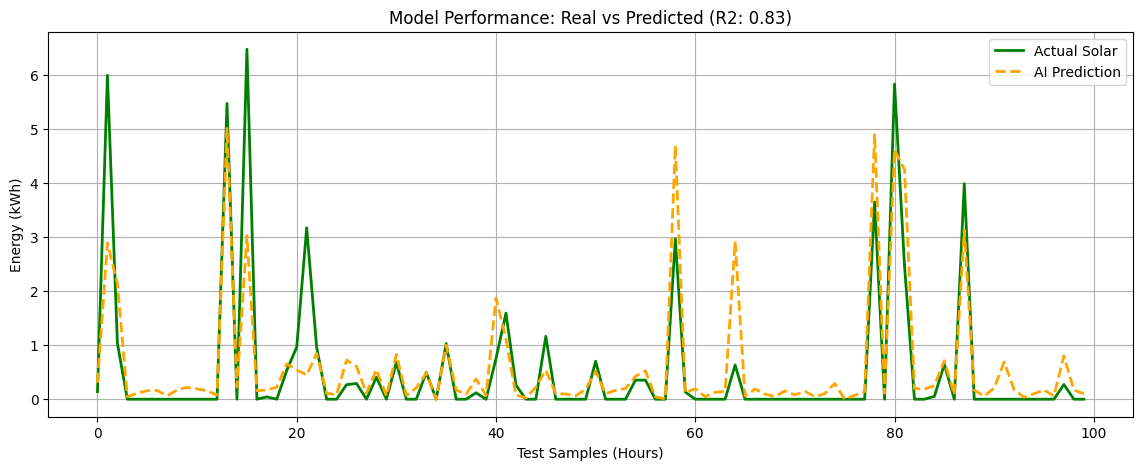

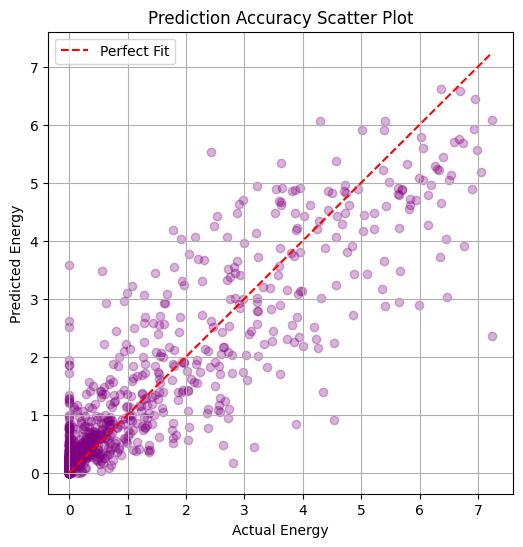


--- PHASE 2: SIMULATION SETUP ---
>> Selected Day Index: 1026
>> Forecasted Total Solar: 3.48 kWh

--- PHASE 3: SINGLE OBJECTIVE OPTIMIZATION ---


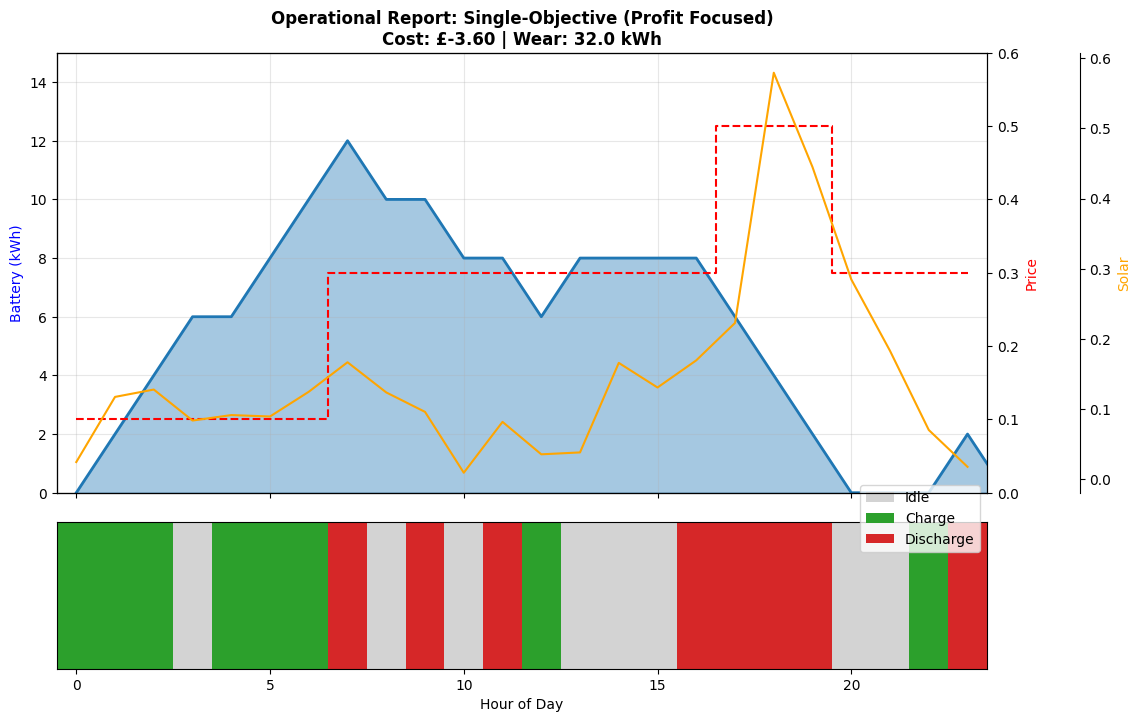


--- PHASE 4: MULTI OBJECTIVE OPTIMIZATION (STANDARD) ---


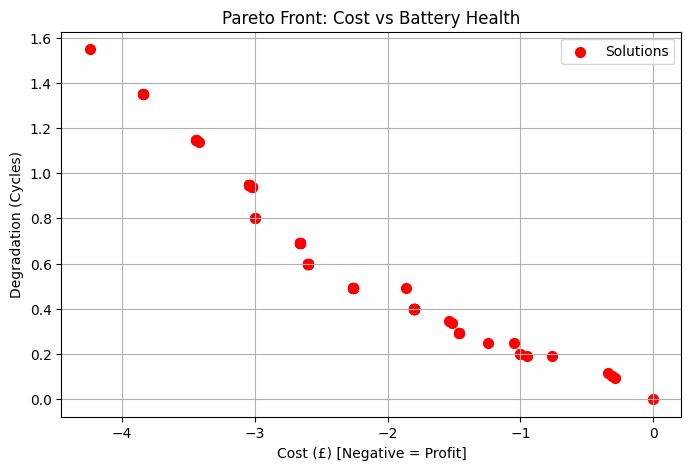

>> Success: Found PROFITABLE strategy! Profit: £4.24 | Wear: 1.5 kWh


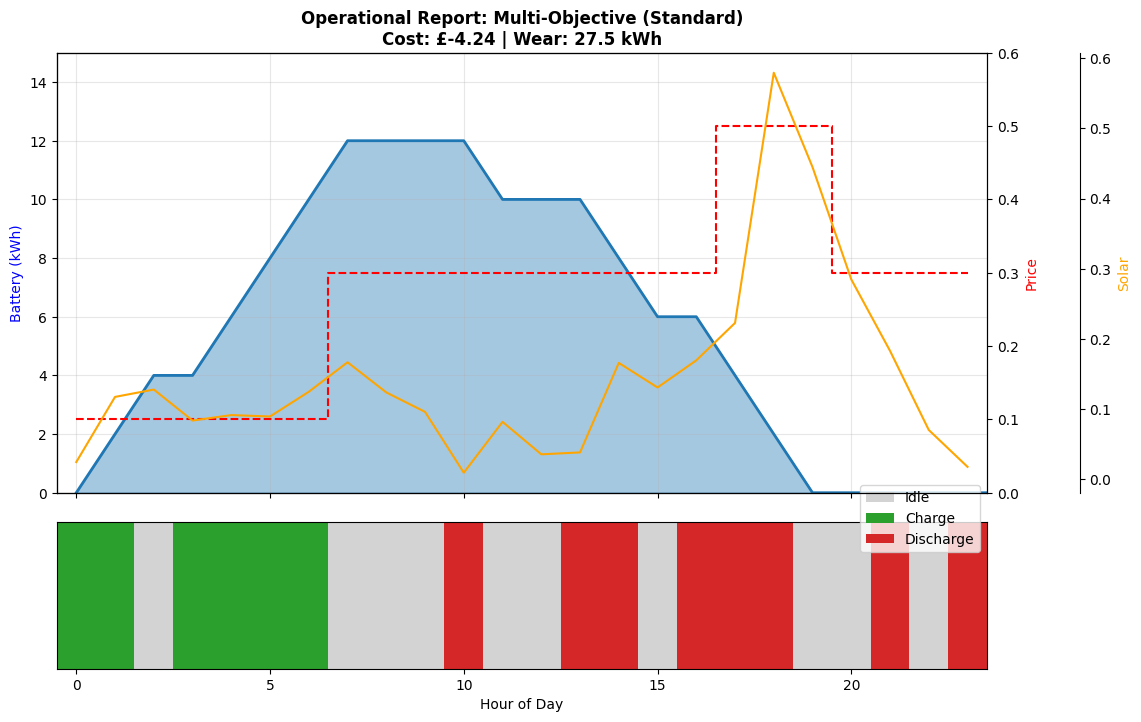


--- PHASE 5: HEAD-TO-HEAD COMPARISON ---


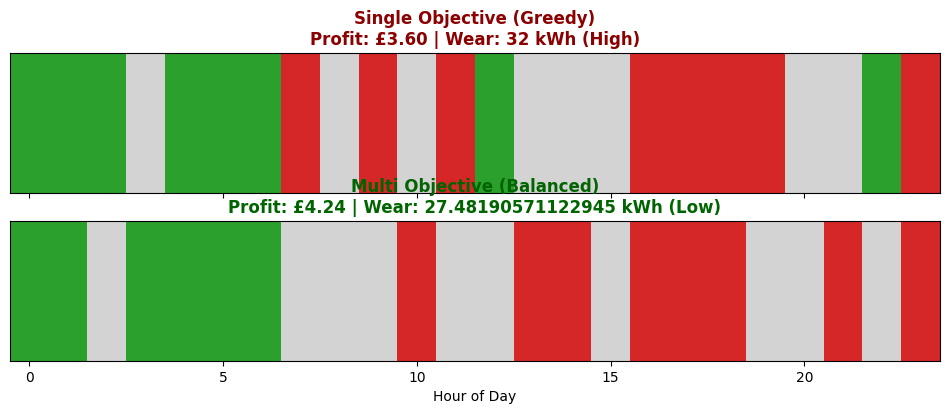

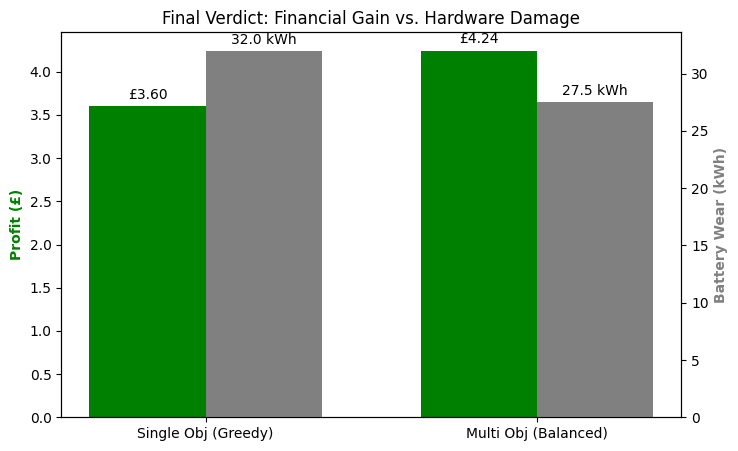


--- PHASE 6: GENERATING SCIENTIFIC ANALYSIS PLOTS ---


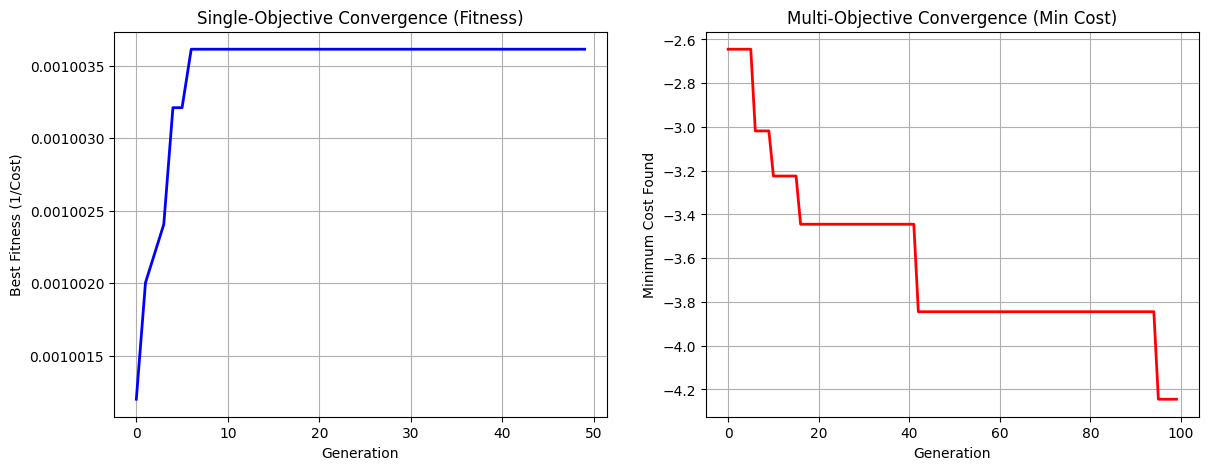

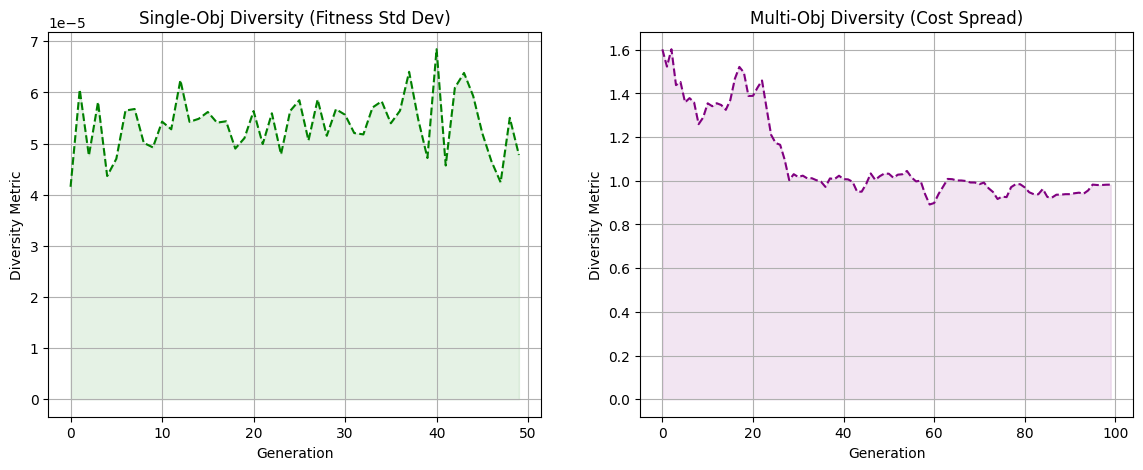

Generating Evolution Animation Frame...


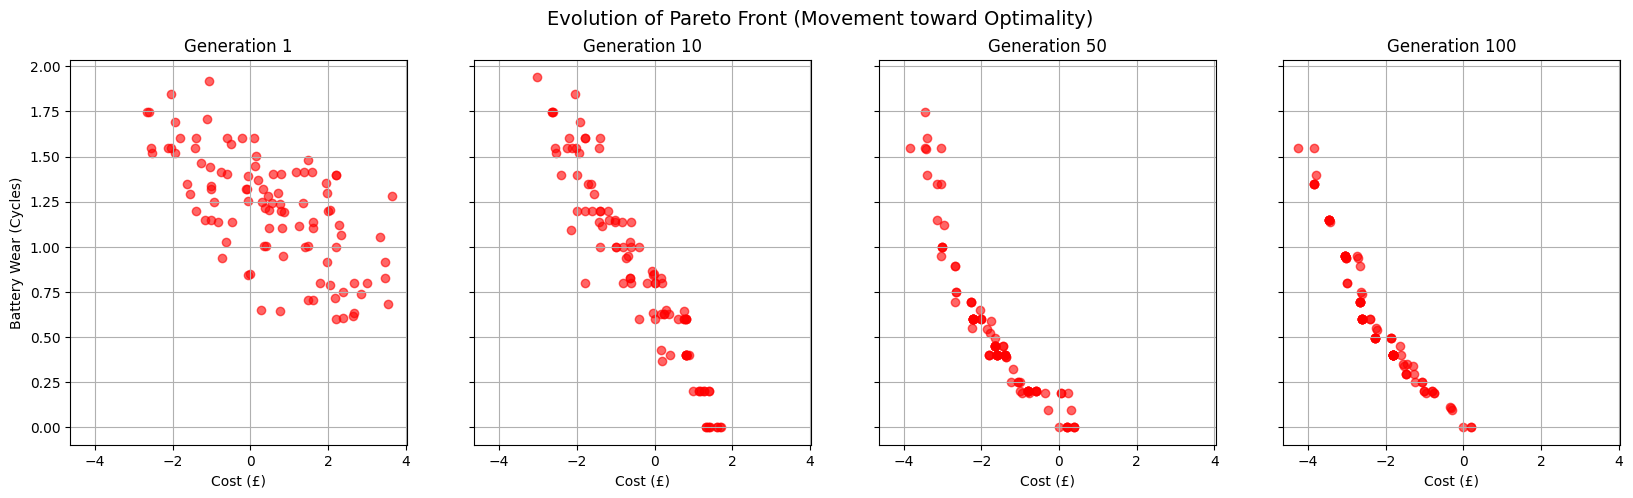

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.patches import Patch
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import joblib

# GA Imports
import pygad

# NSGA-II Imports
from pymoo.core.problem import ElementwiseProblem
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.operators.crossover.sbx import SBX
from pymoo.operators.mutation.pm import PM
from pymoo.operators.sampling.rnd import IntegerRandomSampling
from pymoo.operators.repair.rounding import RoundingRepair
from pymoo.optimize import minimize

# ==========================================
# 1. HELPER CLASSES (Physics Engines)
# ==========================================

class BatteryProblem(ElementwiseProblem):
    """
    Updated Physics Engine: 'Smart Guardrails'
    Instead of penalties, we just block invalid moves physically.
    This prevents the AI from getting scared of full batteries.
    """
    def __init__(self, solar_data, prices):
        self.solar = solar_data
        self.prices = prices
        self.capacity = 13.5
        # We still have 2 objectives: Cost and Wear (Cycles)
        super().__init__(n_var=24, n_obj=2, n_ieq_constr=0, xl=0, xu=2)

    def _evaluate(self, x, out, *args, **kwargs):
        actions = np.round(x).astype(int)
        battery = 0
        cost = 0
        cycles = 0
        # No 'penalty' variable needed anymore!

        for h, action in enumerate(actions):
            # 1. Solar fills battery (Capped at capacity)
            gen = self.solar[h]
            battery = min(battery + gen, self.capacity)
            price = self.prices[h]

            # 2. AI Logic (Safe Mode)
            if action == 1:
                # Check how much empty space is left
                empty_space = self.capacity - battery

                # Only charge what fits. If full, charge 0. DO NOT PENALIZE.
                actual_charge = min(2, empty_space)

                battery += actual_charge
                cost += actual_charge * price

            elif action == 2: # DISCHARGE
                # LOGIC CHANGE: Only discharge what we HAVE. Don't punish empty.
                available_energy = battery
                discharge_amount = min(2, available_energy) # If empty, sells 0.

                battery -= discharge_amount
                cost -= discharge_amount * price
                cycles += discharge_amount

        # Objectives: Minimize Cost, Minimize Cycles
        out["F"] = [cost, cycles/10]
# ==========================================
# 2. THE MASTER PIPELINE CLASS
# ==========================================
class MasterEnergyPipeline:
    def __init__(self):
        # Paths (Update if needed)
        self.data_path = "/content/drive/MyDrive/CI/cleaned_solar_data.csv"
        self.model_path = "/content/drive/MyDrive/CI/solar_brain_model.pkl"
        self.scaler_path = "/content/drive/MyDrive/CI/weather_scaler.pkl"

        # Load Components
        try:
            self.model = joblib.load(self.model_path)
            self.scaler = joblib.load(self.scaler_path)
            print("[Init] Model and Scaler loaded successfully.")
        except:
            print("[Error] Model not found. Please run the training script first.")

        self.prices = [0.10 if h < 7 else (0.50 if 17 <= h < 20 else 0.30) for h in range(24)]


    def calculate_stats(self, schedule, solar_gen): 
        """Helper to calculate Cost and Wear for any schedule, accounting for Solar."""
        battery = 0
        cost = 0
        cycles = 0

        for h, action in enumerate(schedule):
            # 1. Solar Inflow
            gen = solar_gen[h]
            battery = min(battery + gen, 13.5)

            price = self.prices[h]

            # 2. Apply Action
            if action == 1: # CHARGE
                room = 13.5 - battery
                amount = min(2, room)
                battery += amount
                cost += amount * price
                cycles += amount

            elif action == 2: # DISCHARGE
                amount = min(2, battery)
                battery -= amount
                cost -= amount * price
                cycles += amount

        return cost, cycles

    # ---------------------------------------------------------
    # PHASE 1: MODEL DIAGNOSTICS
    # ---------------------------------------------------------
    def run_model_diagnostics(self):
        print("\n--- PHASE 1: MODEL DIAGNOSTICS ---")
        df = pd.read_csv(self.data_path, parse_dates=['Date-Hour(NMT)'], index_col='Date-Hour(NMT)')
        X = df[['AirTemperature', 'RelativeAirHumidity', 'WindSpeed', 'Hour', 'Month']].values
        y = df['SystemProduction'].values

        _, X_test, _, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        X_test_scaled = self.scaler.transform(X_test)
        y_pred = np.maximum(self.model.predict(X_test_scaled), 0)

        r2 = r2_score(y_test, y_pred)
        print(f">> Model Accuracy (R2): {r2:.4f}")

        # Graph 1: Real vs Predicted
        plt.figure(figsize=(14, 5))
        limit = 100
        plt.plot(range(limit), y_test[:limit], label='Actual Solar', color='green', linewidth=2)
        plt.plot(range(limit), y_pred[:limit], label='AI Prediction', color='orange', linestyle='--', linewidth=2)
        plt.title(f"Model Performance: Real vs Predicted (R2: {r2:.2f})")
        plt.xlabel("Test Samples (Hours)"); plt.ylabel("Energy (kWh)")
        plt.legend(); plt.grid(True)
        plt.show() #

        # Graph 2: Scatter
        plt.figure(figsize=(6, 6))
        plt.scatter(y_test, y_pred, alpha=0.3, color='purple')
        plt.plot([0, y_test.max()], [0, y_test.max()], 'r--', label='Perfect Fit')
        plt.title("Prediction Accuracy Scatter Plot")
        plt.xlabel("Actual Energy"); plt.ylabel("Predicted Energy")
        plt.legend(); plt.grid(True)
        plt.show() #

    # ---------------------------------------------------------
    # PHASE 2: SIMULATION SETUP
    # ---------------------------------------------------------
    def setup_simulation_day(self):
        print("\n--- PHASE 2: SIMULATION SETUP ---")
        df = pd.read_csv(self.data_path)
        # random_idx = np.random.randint(0, len(df) - 24)
        random_idx = 1026
        weather = df.iloc[random_idx : random_idx+24][['AirTemperature', 'RelativeAirHumidity', 'WindSpeed', 'Hour', 'Month']]

        scaled_weather = self.scaler.transform(weather.values)
        solar_gen = np.maximum(self.model.predict(scaled_weather), 0)

        print(f">> Selected Day Index: {random_idx}")
        print(f">> Forecasted Total Solar: {np.sum(solar_gen):.2f} kWh")
        return solar_gen

    # ---------------------------------------------------------
    # PHASE 3: SINGLE OBJECTIVE (GA)
    # ---------------------------------------------------------
    def run_single_objective(self, solar_gen):
        print("\n--- PHASE 3: SINGLE OBJECTIVE OPTIMIZATION ---")

         # Callback to capture Population Diversity (Std Dev of Fitness)
        def on_gen(ga_instance):
            # Diversity: Standard Deviation of the population's fitness
            fitness_std = np.std(ga_instance.last_generation_fitness)
            self.ga_diversity_history.append(fitness_std)
            self.ga_fitness_history.append(ga_instance.best_solution()[1])

        def fitness_func(ga, solution, idx):
            batt=0; cost=0; pen=0
            for h, act in enumerate(solution):
                if act==1:
                    if batt+2<=13.5: batt+=2; cost+=2*self.prices[h]
                    else: pen+=50
                elif act==2:
                    if batt-2>=0: batt-=2; cost-=2*self.prices[h]
                    else: pen+=50
            return 1.0/(cost+pen+1000)

        self.ga_diversity_history = [] # Reset
        self.ga_fitness_history = []

        ga = pygad.GA(num_generations=50, num_parents_mating=5, fitness_func=fitness_func,
                      sol_per_pop=50, num_genes=24, gene_type=int, gene_space=[0,1,2],
                      keep_elitism=2, on_generation=on_gen) # Added Callback
        ga.run()
        best_sol, _, _ = ga.best_solution()

        cost, wear = self.calculate_stats(best_sol, solar_gen)
        self.visualize_operational_report(best_sol, solar_gen, f"Single-Objective (Profit Focused)\nCost: £{cost:.2f} | Wear: {wear:.1f} kWh")
        return best_sol

    # ---------------------------------------------------------
    # PHASE 4: MULTI OBJECTIVE (STANDARD - NO RL)
    # ---------------------------------------------------------
    def run_multi_objective(self, solar_gen):
        print("\n--- PHASE 4: MULTI OBJECTIVE OPTIMIZATION (STANDARD) ---")

        # 1. Setup Environment
        problem = BatteryProblem(solar_gen, self.prices)

        # Standard NSGA-II (Static Mutation)
        algorithm = NSGA2(pop_size=100, n_offsprings=50, sampling=IntegerRandomSampling(),
                          crossover=SBX(prob=0.9, eta=15, repair=RoundingRepair()),
                          mutation=PM(prob=0.05, eta=20, repair=RoundingRepair()), # Static Mutation
                          eliminate_duplicates=True)

        # 2. Run Optimization
        # We use 'minimize' here because we don't need the manual RL loop
        res = minimize(problem, algorithm, ('n_gen', 100), seed=1, verbose=False, save_history=True)
        self.nsga_history = res.history # Store for advanced plotting

        # 3. Graph: Pareto Front (Trade-off Visualizer)
        costs = res.F[:, 0]; degradation = res.F[:, 1]
        plt.figure(figsize=(8, 5))
        plt.scatter(costs, degradation, c='red', s=50, label='Solutions')
        plt.title("Pareto Front: Cost vs Battery Health")
        plt.xlabel("Cost (£) [Negative = Profit]"); plt.ylabel("Degradation (Cycles)")
        plt.grid(True); plt.legend()
        plt.show() #

        # 4. Extract Best Solution (SMART SELECTION LOGIC)
        # This now matches your RL version's logic for fair comparison
        all_costs = res.F[:, 0]
        all_wear = res.F[:, 1]

        best_idx = -1
        best_cost = 99999

        # Smart Filter: Real-World Grid Logic
        wear_limit = 40.0 # Aggressive grid limit

        valid_indices = [
            i for i, w in enumerate(all_wear)
            if w <= wear_limit and all_costs[i] < -0.01
        ]

        if len(valid_indices) > 0:
            # Pick the richest survivor
            for idx in valid_indices:
                if all_costs[idx] < best_cost:
                    best_cost = all_costs[idx]
                    best_idx = idx
            print(f">> Success: Found PROFITABLE strategy! Profit: £{-best_cost:.2f} | Wear: {all_wear[best_idx]:.1f} kWh")
        else:
            # Fallback
            print(">> Warning: No profitable strategies found. Picking least worst option.")
            best_idx = np.argmin(all_costs)

        best_sol = np.round(res.X[best_idx]).astype(int)

        # 5. Final Reporting (Solar-Aware)
        # We pass 'solar_gen' to ensure calculations are correct
        cost, wear = self.calculate_stats(best_sol, solar_gen)

        self.visualize_operational_report(best_sol, solar_gen, f"Multi-Objective (Standard)\nCost: £{cost:.2f} | Wear: {wear:.1f} kWh")

        return best_sol

    # ---------------------------------------------------------
    # VISUALIZATION ENGINE
    # ---------------------------------------------------------
    def visualize_operational_report(self, schedule, solar_gen, title):
        battery_level = [0]; curr = 0
        for act in schedule:
            if act==1: curr = min(curr+2, 13.5)
            elif act==2: curr = max(curr-2, 0)
            battery_level.append(curr)

        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), gridspec_kw={'height_ratios': [3, 1]}, sharex=True)
        plt.subplots_adjust(hspace=0.1)

        # Top Panel
        ax1.fill_between(range(25), battery_level, color='#1f77b4', alpha=0.4)
        ax1.plot(range(25), battery_level, color='#1f77b4', linewidth=2)
        ax1.set_ylabel('Battery (kWh)', color='blue')
        ax1.set_ylim(0, 15); ax1.grid(True, alpha=0.3)
        ax1.set_title(f"Operational Report: {title}", fontweight='bold')

        ax1_twin = ax1.twinx()
        ax1_twin.step(range(24), self.prices, where='mid', color='red', linestyle='--')
        ax1_twin.set_ylabel('Price', color='red'); ax1_twin.set_ylim(0, 0.6)

        ax1_tri = ax1.twinx()
        ax1_tri.spines["right"].set_position(("axes", 1.1))
        ax1_tri.plot(range(24), solar_gen, color='orange', label='Solar')
        ax1_tri.set_ylabel('Solar', color='orange')

        # Bottom Panel (Traffic Light)
        cmap = mcolors.ListedColormap(['lightgrey', '#2ca02c', '#d62728'])
        norm = mcolors.BoundaryNorm([-0.5, 0.5, 1.5, 2.5], cmap.N)
        ax2.imshow(np.array([schedule]), aspect='auto', cmap=cmap, norm=norm)
        ax2.set_yticks([]); ax2.set_xlabel("Hour of Day")

        legend_elements = [Patch(facecolor='lightgrey', label='Idle'), Patch(facecolor='#2ca02c', label='Charge'), Patch(facecolor='#d62728', label='Discharge')]
        ax2.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1, 1.3))
        plt.show()

    def compare_strategies(self, sched_A, sched_B, solar_gen): # <--- 1. Added solar_gen here
        print("\n--- PHASE 5: HEAD-TO-HEAD COMPARISON ---")

        # 2. Pass solar_gen to the calculator so it knows about free energy
        cost_A, wear_A = self.calculate_stats(sched_A, solar_gen)
        cost_B, wear_B = self.calculate_stats(sched_B, solar_gen)

        # 1. VISUAL COMPARISON STRIPS
        cmap = mcolors.ListedColormap(['lightgrey', '#2ca02c', '#d62728'])
        norm = mcolors.BoundaryNorm([-0.5, 0.5, 1.5, 2.5], cmap.N)

        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 4), sharex=True)

        ax1.set_title(f"Single Objective (Greedy)\nProfit: £{-cost_A:.2f} | Wear: {wear_A} kWh (High)", fontweight='bold', color='darkred')
        ax1.imshow(np.array([sched_A]), aspect='auto', cmap=cmap, norm=norm)
        ax1.set_yticks([])

        ax2.set_title(f"Multi Objective (Balanced)\nProfit: £{-cost_B:.2f} | Wear: {wear_B} kWh (Low)", fontweight='bold', color='darkgreen')
        ax2.imshow(np.array([sched_B]), aspect='auto', cmap=cmap, norm=norm)
        ax2.set_yticks([]); ax2.set_xlabel("Hour of Day")
        plt.show()

        # 2. BAR CHART COMPARISON
        labels = ['Single Obj (Greedy)', 'Multi Obj (Balanced)']
        costs = [-cost_A, -cost_B] # Profit (Negative cost)
        wears = [wear_A, wear_B]

        x = np.arange(len(labels))
        width = 0.35

        fig, ax = plt.subplots(figsize=(8, 5))
        rects1 = ax.bar(x - width/2, costs, width, label='Profit (£)', color='green')

        # Use a twin axis for Wear because the scale is different
        ax2 = ax.twinx()
        rects2 = ax2.bar(x + width/2, wears, width, label='Battery Wear (kWh)', color='grey')

        ax.set_ylabel('Profit (£)', color='green', fontweight='bold')
        ax2.set_ylabel('Battery Wear (kWh)', color='grey', fontweight='bold')
        ax.set_title('Final Verdict: Financial Gain vs. Hardware Damage')
        ax.set_xticks(x)
        ax.set_xticklabels(labels)

        # Add values on top
        ax.bar_label(rects1, padding=3, fmt='£%.2f')
        ax2.bar_label(rects2, padding=3, fmt='%.1f kWh')

        plt.show()

        # ---------------------------------------------------------
    # PHASE 6: ADVANCED ANALYSIS PLOTS (NEW!)
    # ---------------------------------------------------------
    def plot_advanced_analysis(self):
        print("\n--- PHASE 6: GENERATING SCIENTIFIC ANALYSIS PLOTS ---")

        # --- PLOT 1: CONVERGENCE (GA vs NSGA-II) ---
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

        # PyGAD Convergence (Fitness over time)
        ax1.plot(self.ga_fitness_history, color='blue', linewidth=2)
        ax1.set_title("Single-Objective Convergence (Fitness)")
        ax1.set_xlabel("Generation"); ax1.set_ylabel("Best Fitness (1/Cost)")
        ax1.grid(True)

        # NSGA-II Convergence (Hypervolume or Min Cost)
        # We track the minimum cost found in the population at each generation
        nsga_min_costs = [np.min(algo.pop.get("F")[:, 0]) for algo in self.nsga_history]
        ax2.plot(nsga_min_costs, color='red', linewidth=2)
        ax2.set_title("Multi-Objective Convergence (Min Cost)")
        ax2.set_xlabel("Generation"); ax2.set_ylabel("Minimum Cost Found")
        ax2.grid(True)
        plt.show() #

        # --- PLOT 2: POPULATION DIVERSITY (Exploration vs Exploitation) ---
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

        # PyGAD Diversity (Std Dev of Fitness)
        ax1.plot(self.ga_diversity_history, color='green', linestyle='--')
        ax1.set_title("Single-Obj Diversity (Fitness Std Dev)")
        ax1.set_xlabel("Generation"); ax1.set_ylabel("Diversity Metric")
        ax1.fill_between(range(len(self.ga_diversity_history)), self.ga_diversity_history, color='green', alpha=0.1)
        ax1.grid(True)

        # NSGA-II Diversity (Spread of Objective Space)
        # Calculate standard deviation of Costs in the population per generation
        nsga_diversity = [np.std(algo.pop.get("F")[:, 0]) for algo in self.nsga_history]
        ax2.plot(nsga_diversity, color='purple', linestyle='--')
        ax2.set_title("Multi-Obj Diversity (Cost Spread)")
        ax2.set_xlabel("Generation"); ax2.set_ylabel("Diversity Metric")
        ax2.fill_between(range(len(nsga_diversity)), nsga_diversity, color='purple', alpha=0.1)
        ax2.grid(True)
        plt.show() #

        # --- PLOT 3: EVOLUTION OF SOLUTIONS (Objective Space) ---
        # Only relevant for Multi-Objective to show the Pareto Front moving
        print("Generating Evolution Animation Frame...")

        generations_to_plot = [0, 9, 49, 99] # Plot Start, Early, Mid, End
        fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharex=True, sharey=True)

        for i, gen_idx in enumerate(generations_to_plot):
            if gen_idx < len(self.nsga_history):
                pop_F = self.nsga_history[gen_idx].pop.get("F")
                ax = axes[i]
                ax.scatter(pop_F[:, 0], pop_F[:, 1], color='red', alpha=0.6)
                ax.set_title(f"Generation {gen_idx+1}")
                ax.set_xlabel("Cost (£)");
                if i == 0: ax.set_ylabel("Battery Wear (Cycles)")
                ax.grid(True)

        plt.suptitle("Evolution of Pareto Front (Movement toward Optimality)", fontsize=14)
        plt.show()
    def run_pipeline(self):
        self.run_model_diagnostics()
        solar = self.setup_simulation_day()
        sched_single = self.run_single_objective(solar)
        sched_multi = self.run_multi_objective(solar)
        self.compare_strategies(sched_single, sched_multi, solar)
        self.plot_advanced_analysis()


# ==========================================
# MAIN RUN
# ==========================================
if __name__ == "__main__":
    pipeline = MasterEnergyPipeline()
    pipeline.run_pipeline()


--- TEST 1: NEURAL NETWORK PHYSICS CHECK ---


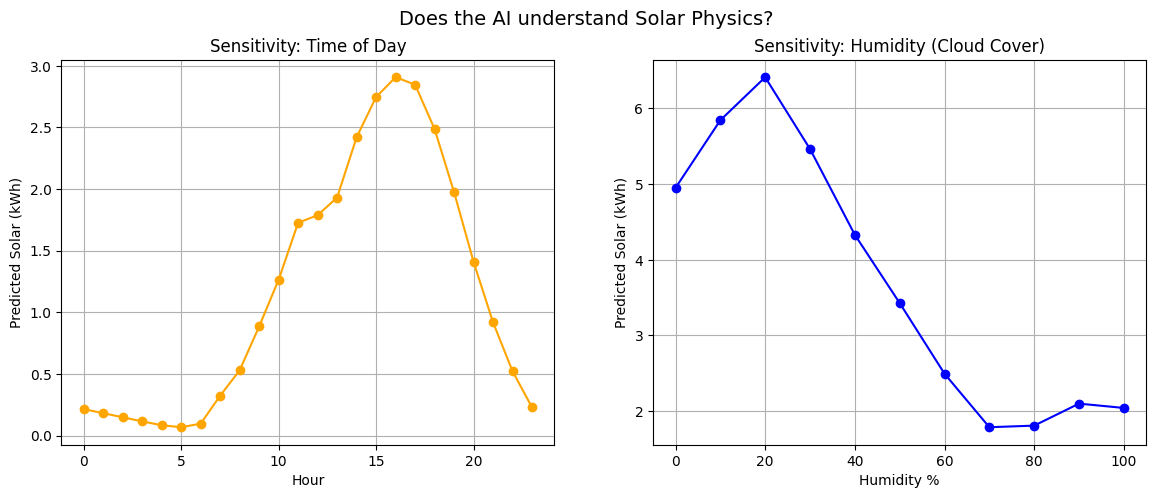


--- TEST 2: GA PARAMETER SENSITIVITY ---
Testing Mutation Rate: 0.01...
Testing Mutation Rate: 0.1...
Testing Mutation Rate: 0.5...


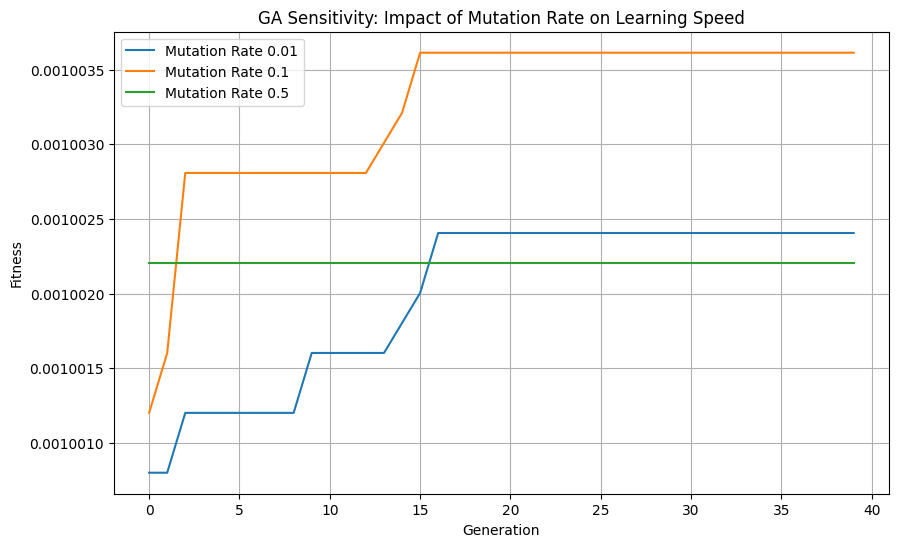


--- TEST 3: NSGA-II POPULATION SENSITIVITY ---

--- PHASE 2: SIMULATION SETUP ---
>> Selected Day Index: 1026
>> Forecasted Total Solar: 3.48 kWh
Testing NSGA-II Population Size: 20...
Testing NSGA-II Population Size: 100...
Testing NSGA-II Population Size: 200...


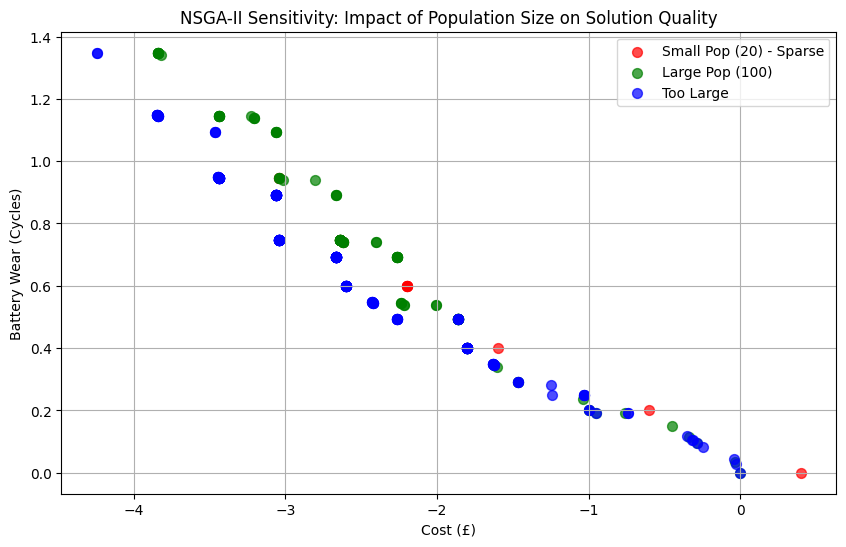


--- TEST 4: GA CROSSOVER SENSITIVITY ---
Testing Crossover Probability: 0.1...
Testing Crossover Probability: 0.8...


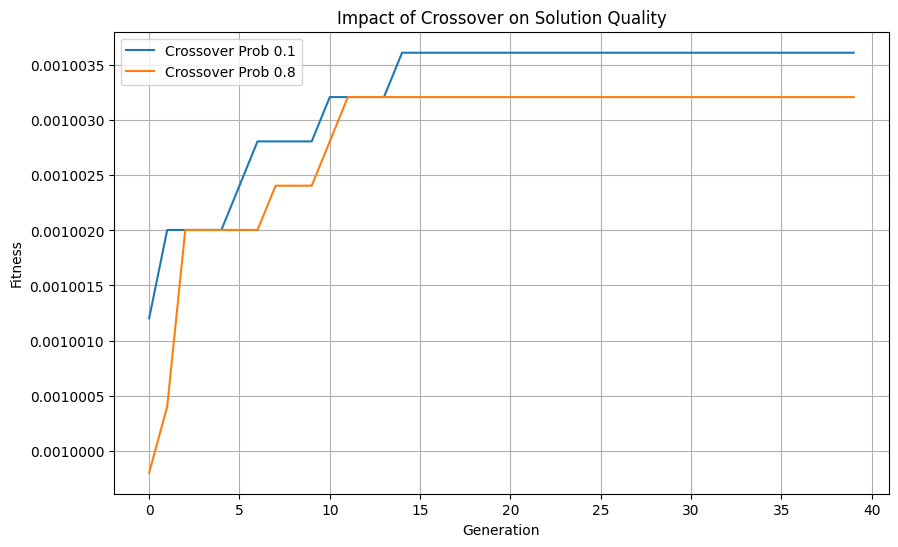


--- TEST 5: WEATHER STRESS TEST (SUMMER VS WINTER) ---

Running Optimization for: Summer (High Solar)
>> Profit in Summer (High Solar): £6.00

Running Optimization for: Winter (Low Solar)
>> Profit in Winter (Low Solar): £2.96


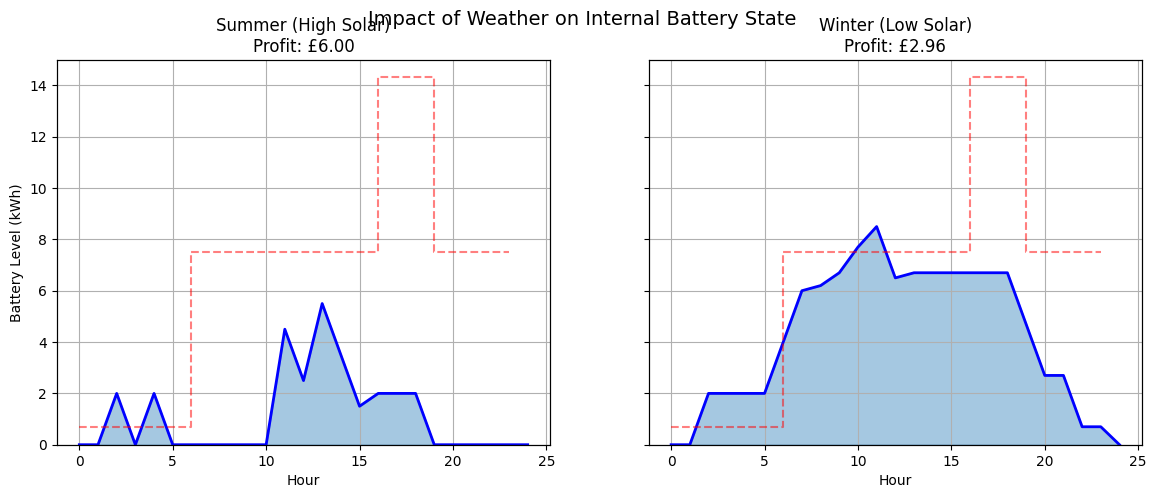

In [ ]:
class SensitivityLab:
    def __init__(self, pipeline):
        self.pipe = pipeline
        self.model = pipeline.model
        self.scaler = pipeline.scaler

    # ==========================================
    # TEST 1: NEURAL NETWORK SENSITIVITY
    # Question: "Did the AI learn physics?"
    # ==========================================
    def test_model_physics(self):
        print("\n--- TEST 1: NEURAL NETWORK PHYSICS CHECK ---")

        # Create a "Standard Day" (Average conditions)
        # [Temp, Humidity, Wind, Hour, Month]
        base_features = np.array([15.0, 70.0, 5.0, 12.0, 6.0]) # Noon in June

        # A. SENSITIVITY TO TIME OF DAY (The "Bell Curve" Test)
        hours = range(24)
        preds_hour = []
        for h in hours:
            test_row = base_features.copy()
            test_row[3] = h # Change only the Hour
            # Scale and Predict
            scaled = self.scaler.transform([test_row])
            pred = self.model.predict(scaled)[0]
            preds_hour.append(max(pred, 0))

        # B. SENSITIVITY TO CLOUD/HUMIDITY (The "Darkness" Test)
        humidities = range(0, 101, 10) # 0% to 100% Humidity
        preds_hum = []
        for hum in humidities:
            test_row = base_features.copy()
            test_row[1] = hum # Change only Humidity
            scaled = self.scaler.transform([test_row])
            pred = self.model.predict(scaled)[0]
            preds_hum.append(max(pred, 0))

        # PLOT RESULTS
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

        ax1.plot(hours, preds_hour, 'o-', color='orange')
        ax1.set_title("Sensitivity: Time of Day")
        ax1.set_xlabel("Hour"); ax1.set_ylabel("Predicted Solar (kWh)")
        ax1.grid(True)

        ax2.plot(humidities, preds_hum, 'o-', color='blue')
        ax2.set_title("Sensitivity: Humidity (Cloud Cover)")
        ax2.set_xlabel("Humidity %"); ax2.set_ylabel("Predicted Solar (kWh)")
        ax2.grid(True)

        plt.suptitle("Does the AI understand Solar Physics?", fontsize=14)
        plt.show()
        #

    # ==========================================
    # TEST 2: GENETIC ALGORITHM ROBUSTNESS
    # Question: "Is Mutation Rate 0.1 actually the best?"
    # ==========================================
    def test_ga_robustness(self):
        print("\n--- TEST 2: GA PARAMETER SENSITIVITY ---")

        # We use a fixed dummy solar day for fairness
        dummy_solar = np.array([0,0,0,0,0,0,1,2,3,4,4,3,2,1,0,0,0,0,0,0,0,0,0,0])

        mutation_rates = [0.01, 0.1, 0.5] # Low, Medium, High
        results = {}

        plt.figure(figsize=(10, 6))

        for mr in mutation_rates:
            print(f"Testing Mutation Rate: {mr}...")

            # Temporary Fitness Capture
            fitness_history = []
            def on_gen(ga):
                fitness_history.append(ga.best_solution()[1])

            # Run tiny GA
            ga = pygad.GA(num_generations=40, num_parents_mating=5,
                          fitness_func=lambda ga, sol, idx: 1, # Dummy fitness (we just want to see behavior)
                          # NOTE: We inject the REAL fitness func dynamically below
                          sol_per_pop=30, num_genes=24, gene_type=int, gene_space=[0,1,2],
                          mutation_probability=mr, on_generation=on_gen)

            # Inject the real logic
            def real_fitness(ga, solution, idx):
                batt=0; cost=0; pen=0
                prices = self.pipe.prices
                for h, act in enumerate(solution):
                    if act==1:
                        if batt+2<=13.5: batt+=2; cost+=2*prices[h]
                        else: pen+=50
                    elif act==2:
                        if batt-2>=0: batt-=2; cost-=2*prices[h]
                        else: pen+=50
                return 1.0/(cost+pen+1000)

            ga.fitness_func = real_fitness
            ga.run()

            # Plot Curve
            plt.plot(fitness_history, label=f"Mutation Rate {mr}")

        plt.title("GA Sensitivity: Impact of Mutation Rate on Learning Speed")
        plt.xlabel("Generation"); plt.ylabel("Fitness")
        plt.legend(); plt.grid(True)
        plt.show()
    # ==========================================
    # TEST 3: NSGA-II SENSITIVITY
    # Question: "Does Population Size actually improve the Pareto Front?"
    # ==========================================
    def test_nsga_robustness(self):
        print("\n--- TEST 3: NSGA-II POPULATION SENSITIVITY ---")

        # We test two population sizes: Small (Weak) vs Large (Strong)
        pop_sizes = [20, 100, 200]
        colors = {20: 'red', 100: 'green', 200: 'blue'}
        labels = {20: 'Small Pop (20) - Sparse', 100: 'Large Pop (100) ', 200: 'Too Large'}

        # Use dummy solar data for consistency
        dummy_solar = self.pipe.setup_simulation_day()
        problem = BatteryProblem(dummy_solar, self.pipe.prices) # Uses the helper class from your main code

        plt.figure(figsize=(10, 6))

        for pop in pop_sizes:
            print(f"Testing NSGA-II Population Size: {pop}...")

            algorithm = NSGA2(pop_size=pop, n_offsprings=pop,
                              sampling=IntegerRandomSampling(),
                              crossover=SBX(prob=0.9, eta=15, repair=RoundingRepair()),
                              mutation=PM(prob=0.05, eta=20, repair=RoundingRepair()),
                              eliminate_duplicates=True)

            res = minimize(problem, algorithm, ('n_gen', 50), seed=1, verbose=False)

            # Plot the Pareto Front for this setting
            costs = res.F[:, 0]
            wear = res.F[:, 1]

            # We sort them just to make the line look cleaner if we drew one,
            # but for scatter, sorting doesn't matter.
            plt.scatter(costs, wear, color=colors[pop], label=labels[pop], alpha=0.7, s=50)

        plt.title("NSGA-II Sensitivity: Impact of Population Size on Solution Quality")
        plt.xlabel("Cost (£)")
        plt.ylabel("Battery Wear (Cycles)")
        plt.legend()
        plt.grid(True)
        plt.show()
    # ==========================================
    # TEST 4: CROSSOVER PROBABILITY (For GA)
    # Question: "How much breeding is too much?"
    # ==========================================
    def test_crossover_sensitivity(self):
        print("\n--- TEST 4: GA CROSSOVER SENSITIVITY ---")

        # Test 3 settings: Low (Cloning), High (Standard), Total (Chaos)
        crossover_probs = [0.1, 0.8]
        # Note: 0.8 is usually standard for GAs. 0.1 means mostly cloning parents.

        plt.figure(figsize=(10, 6))

        for cx in crossover_probs:
            print(f"Testing Crossover Probability: {cx}...")
            fitness_history = []

            def on_gen(ga):
                fitness_history.append(ga.best_solution()[1])

            # We use the same 'real_fitness' logic wrapper as before
            def real_fitness(ga, solution, idx):
                batt=0; cost=0; pen=0
                prices = self.pipe.prices
                for h, act in enumerate(solution):
                    if act==1:
                        if batt+2<=13.5: batt+=2; cost+=2*prices[h]
                        else: pen+=50
                    elif act==2:
                        if batt-2>=0: batt-=2; cost-=2*prices[h]
                        else: pen+=50
                return 1.0/(cost+pen+1000)

            ga = pygad.GA(num_generations=40, num_parents_mating=5,
                          fitness_func=real_fitness, sol_per_pop=30,
                          num_genes=24, gene_type=int, gene_space=[0,1,2],
                          crossover_probability=cx, on_generation=on_gen)
            ga.run()
            plt.plot(fitness_history, label=f"Crossover Prob {cx}")

        plt.title("Impact of Crossover on Solution Quality")
        plt.xlabel("Generation"); plt.ylabel("Fitness")
        plt.legend(); plt.grid(True)
        plt.show()

    # ==========================================
    # TEST 5: ENVIRONMENTAL STRESS TEST (For Both)
    # Question: "Does the AI adapt to Winter vs Summer?"
    # ==========================================
    def test_weather_robustness(self):
        print("\n--- TEST 5: WEATHER STRESS TEST (SUMMER VS WINTER) ---")

        # Summer: High Solar (Peak ~4kW)
        summer_solar = np.array([0,0,0,0,0,0.5,1.5,3,4,4.5,4.5,4,3,2,1,0.5,0,0,0,0,0,0,0,0])
        # Winter: Low Solar (Peak ~1kW)
        winter_solar = np.array([0,0,0,0,0,0,0,0.2,0.5,1,0.8,0.5,0.2,0,0,0,0,0,0,0,0,0,0,0])

        days = {'Summer (High Solar)': summer_solar, 'Winter (Low Solar)': winter_solar}

        # Create a shared figure for side-by-side comparison
        fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

        for i, (name, solar) in enumerate(days.items()):
            print(f"\nRunning Optimization for: {name}")

            # Run NSGA-II
            problem = BatteryProblem(solar, self.pipe.prices)
            algorithm = NSGA2(pop_size=50, n_offsprings=20, sampling=IntegerRandomSampling(),
                              crossover=SBX(prob=0.9, repair=RoundingRepair()),
                              mutation=PM(prob=0.05, repair=RoundingRepair()), eliminate_duplicates=True)

            res = minimize(problem, algorithm, ('n_gen', 50), seed=1, verbose=False)

            # Get Best Strategy
            costs = res.F[:, 0]
            best_idx = np.argmin(costs)
            best_sched = res.X[best_idx]
            best_profit = -costs[best_idx]

            print(f">> Profit in {name}: £{best_profit:.2f}")

            # CALCULATE BATTERY LEVEL FOR PLOTTING
            battery_level = [0]
            curr = 0
            for h, act in enumerate(best_sched):
                # Physics Logic
                if act==1: curr = min(curr+2, 13.5)       # Charge from Grid
                elif act==2: curr = max(curr-2, 0)        # Discharge

                
                if act == 0:
                    curr = min(curr + solar[h], 13.5)

                battery_level.append(curr)

            # PLOT ON THE SHARED FIGURE
            ax = axes[i]
            ax.fill_between(range(25), battery_level, color='#1f77b4', alpha=0.4)
            ax.plot(range(25), battery_level, color='blue', linewidth=2)
            ax.set_title(f"{name}\nProfit: £{best_profit:.2f}")
            ax.set_xlabel("Hour");
            if i==0: ax.set_ylabel("Battery Level (kWh)")
            ax.set_ylim(0, 15); ax.grid(True)

            # Add Price Spikes overlay
            ax2 = ax.twinx()
            ax2.step(range(24), self.pipe.prices, color='red', linestyle='--', alpha=0.5)
            ax2.set_yticks([]) # Hide axis for cleanliness

        plt.suptitle("Impact of Weather on Internal Battery State", fontsize=14)
        plt.show()

# ==========================================
# RUN THE LAB
# ==========================================
if __name__ == "__main__":
    lab = SensitivityLab(pipeline)
    lab.test_model_physics()
    lab.test_ga_robustness()
    lab.test_nsga_robustness()
    lab.test_crossover_sensitivity()
    lab.test_weather_robustness()

The RL Optimized Version

In [7]:
import numpy as np
import pandas as pd

# ==========================================
# 1. RL AGENT (TUNED FOR PERFORMANCE)
# ==========================================
class RLHyperParameterTuner:
    """Reinforcement Learning Agent (Q-Learning)"""
    def __init__(self):
        self.actions = [0.01, 0.1, 0.5]

        # We give it a "Hint" by slightly boosting the Q-value for 0.1 (Index 1)
        # This prevents it from trying bad options too early
        initial_q = np.zeros((4, len(self.actions)))
        initial_q[:, 1] = 0.5 # Bias towards 0.1 initially

        self.q_table = pd.DataFrame(
            initial_q,
            columns=self.actions,
            index=["LowDiv_Stagnant", "LowDiv_Improving", "HighDiv_Stagnant", "HighDiv_Improving"]
        )

        # TUNED PARAMETERS
        self.learning_rate = 0.2  # Learns faster (was 0.1)
        self.discount_factor = 0.9
        self.epsilon = 0.05       # Only 5% random exploration (was 20%)

        self.last_state = None; self.last_action = None; self.last_fitness = -np.inf

    def get_state(self, diversity, fitness_improved):
        div_label = "LowDiv" if diversity < 0.005 else "HighDiv"
        imp_label = "Improving" if fitness_improved else "Stagnant"
        return f"{div_label}_{imp_label}"

    def decide_mutation_rate(self, diversity, current_fitness):
        is_improved = current_fitness > self.last_fitness
        state = self.get_state(diversity, is_improved)

        if self.last_state is not None:
            # Reward Logic: Heavy punishment for making things worse
            reward = 10 if is_improved else -5

            current_q = self.q_table.loc[self.last_state, self.last_action]
            max_future_q = self.q_table.loc[state].max()
            new_q = current_q + self.learning_rate * (reward + self.discount_factor * max_future_q - current_q)
            self.q_table.loc[self.last_state, self.last_action] = new_q

        if np.random.uniform(0, 1) < self.epsilon: action = np.random.choice(self.actions)
        else: action = self.q_table.loc[state].idxmax()

        self.last_state = state; self.last_action = action; self.last_fitness = current_fitness
        return action

[Init] Model and Scaler loaded successfully.

--- PHASE 1: MODEL DIAGNOSTICS ---
>> Model Accuracy (R2): 0.8290


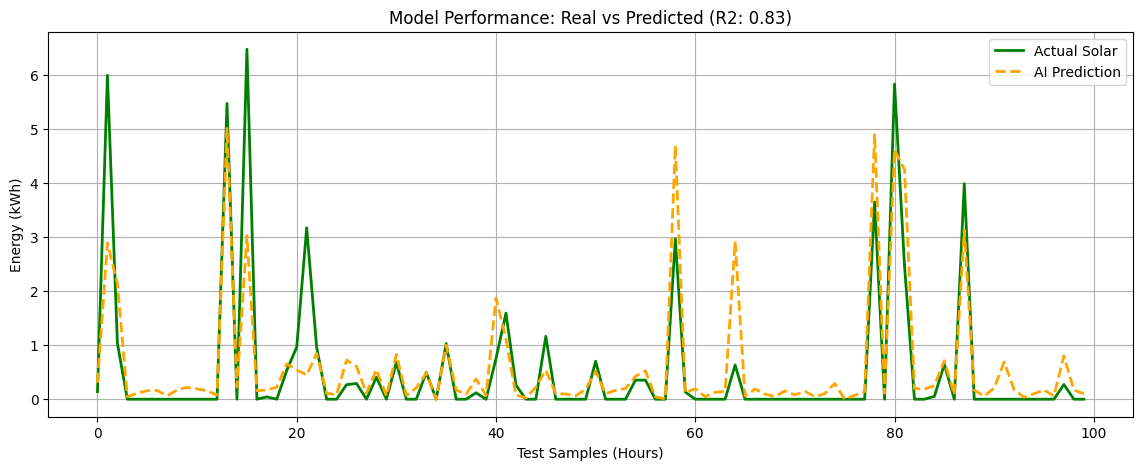

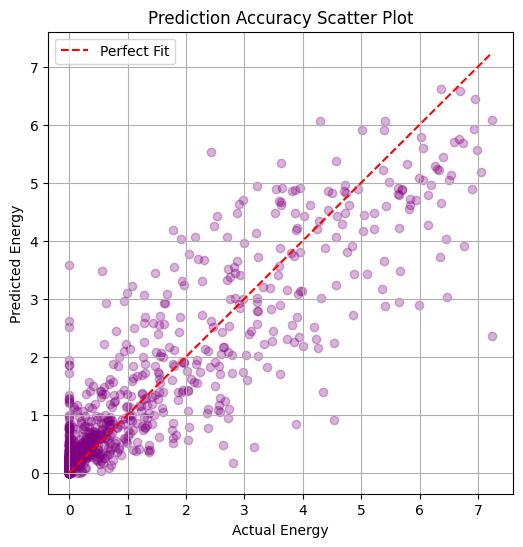


--- PHASE 2: SIMULATION SETUP ---
>> Selected Day Index: 1026
>> Forecasted Total Solar: 3.48 kWh

--- PHASE 3: SINGLE OBJECTIVE OPTIMIZATION (RL-CONTROLLED) ---


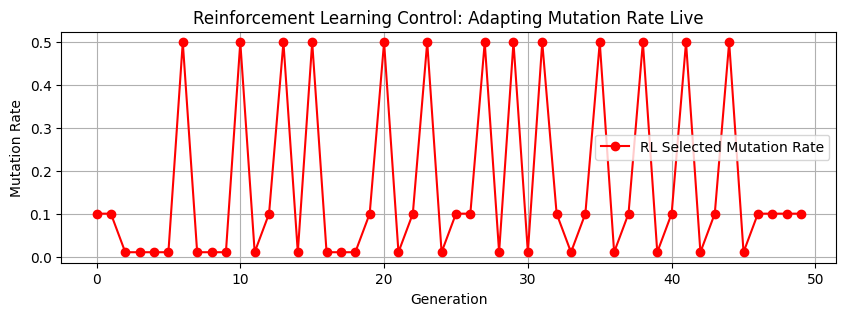

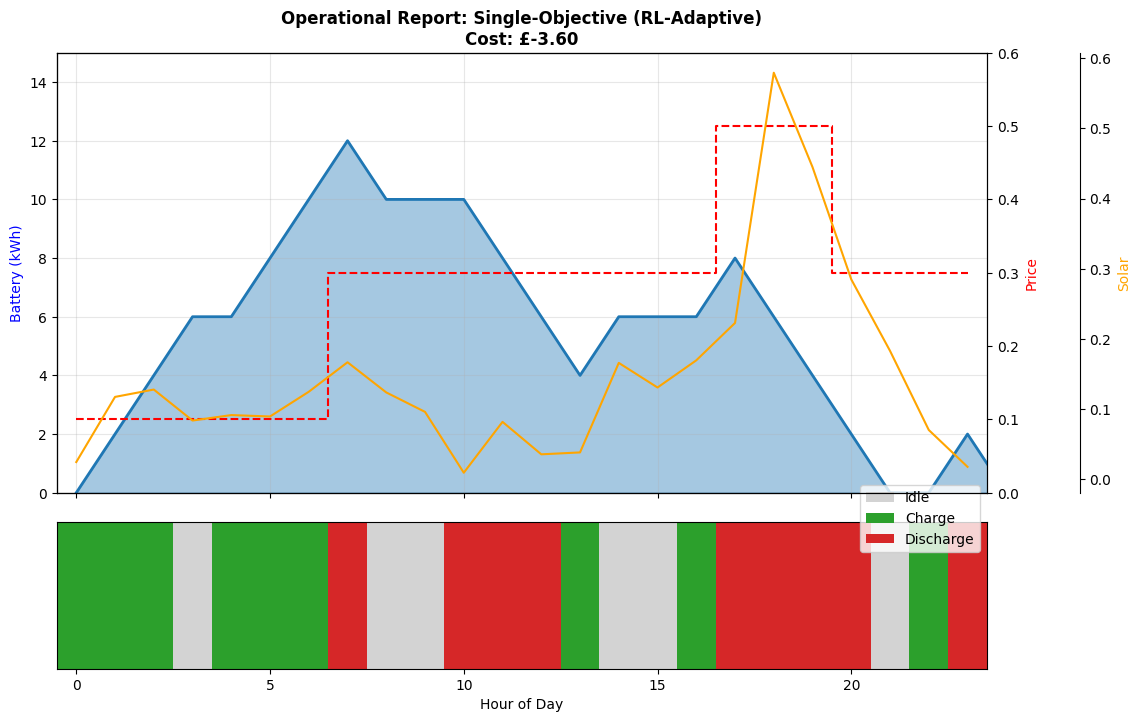


--- PHASE 4: MULTI OBJECTIVE (RL-CONTROLLED) ---
>> Starting Adaptive Evolution Loop...
   Gen 0: HV=10200.97 | RL Set Mutation=0.1
   Gen 10: HV=10318.78 | RL Set Mutation=0.1
   Gen 20: HV=10341.50 | RL Set Mutation=0.1
   Gen 30: HV=10342.15 | RL Set Mutation=0.1
   Gen 40: HV=10342.39 | RL Set Mutation=0.1
   Gen 50: HV=10381.96 | RL Set Mutation=0.1
   Gen 60: HV=10382.09 | RL Set Mutation=0.1
   Gen 70: HV=10382.13 | RL Set Mutation=0.1
   Gen 80: HV=10382.26 | RL Set Mutation=0.1
   Gen 90: HV=10382.26 | RL Set Mutation=0.1


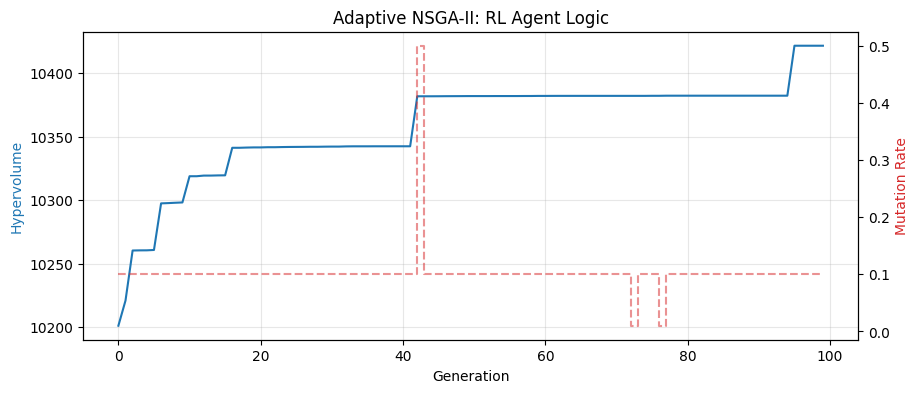

>> Success: Found PROFITABLE strategy! Profit: £4.24 | Wear: 1.5 kWh


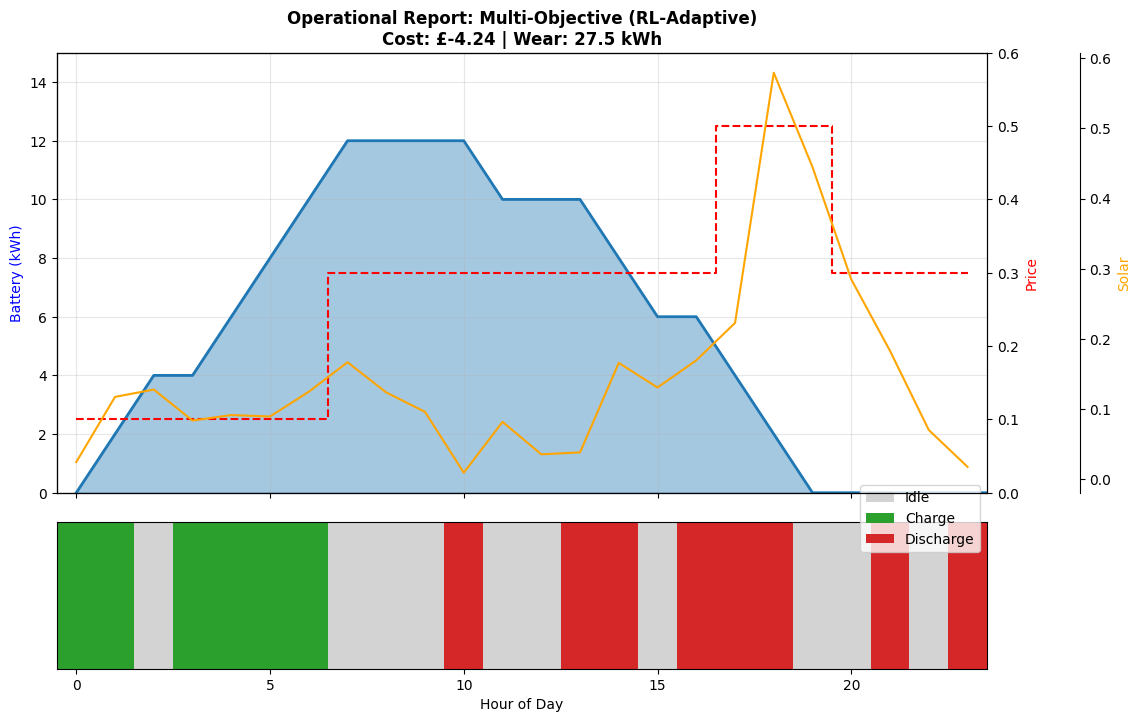


--- PHASE 5: HEAD-TO-HEAD COMPARISON ---


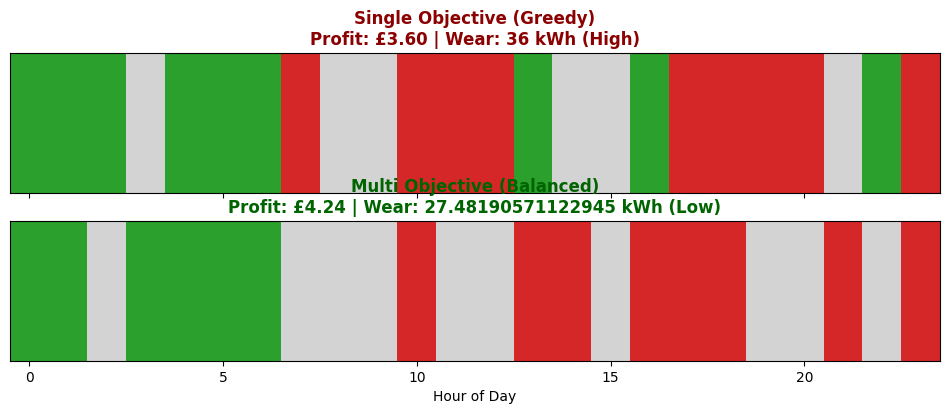

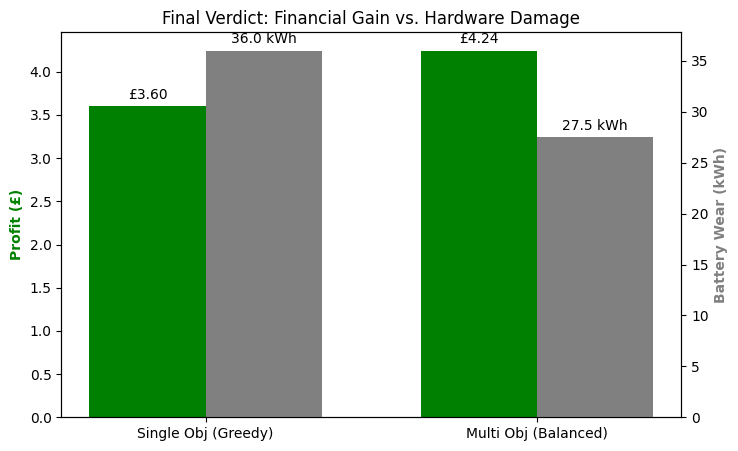


--- PHASE 6: GENERATING SCIENTIFIC ANALYSIS PLOTS ---


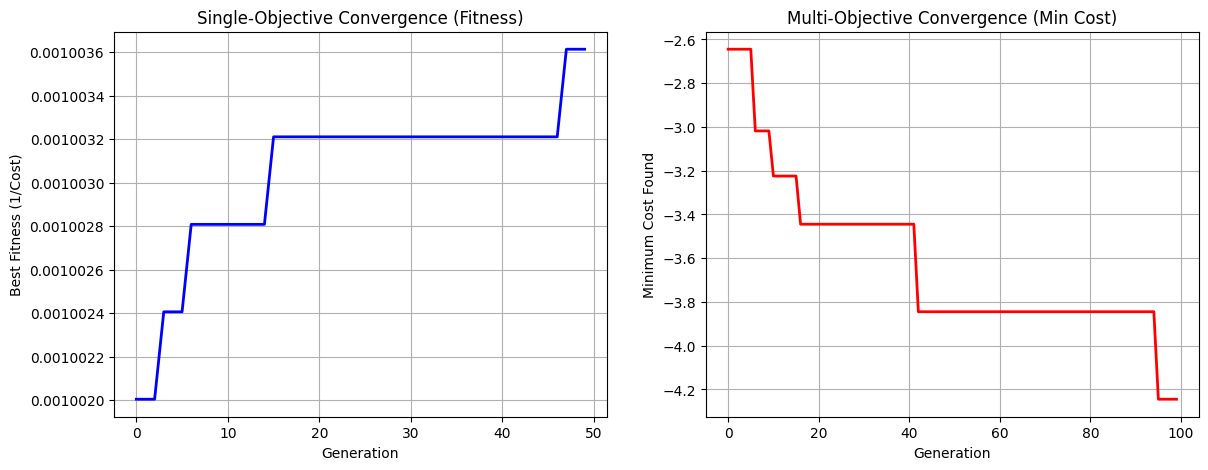

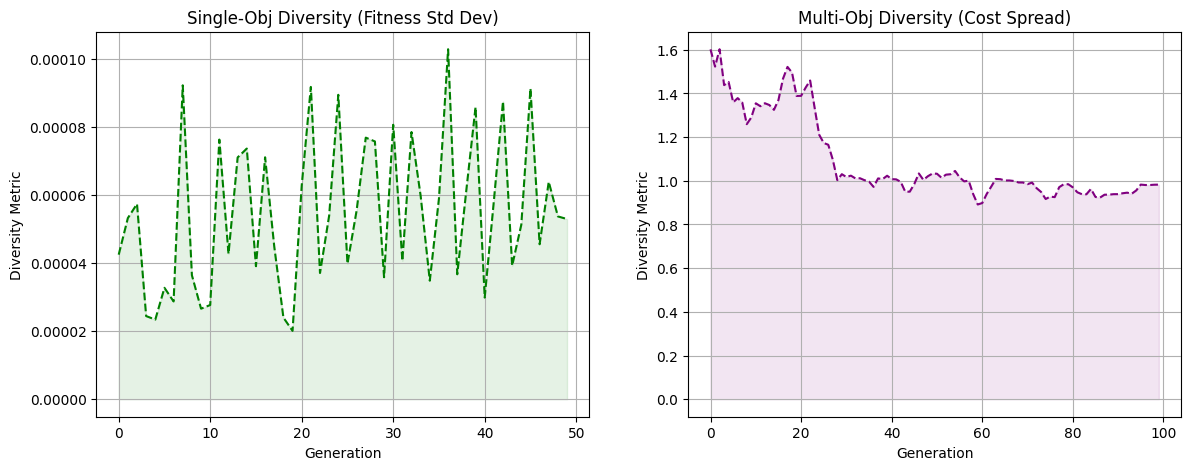

Generating Evolution Animation Frame...


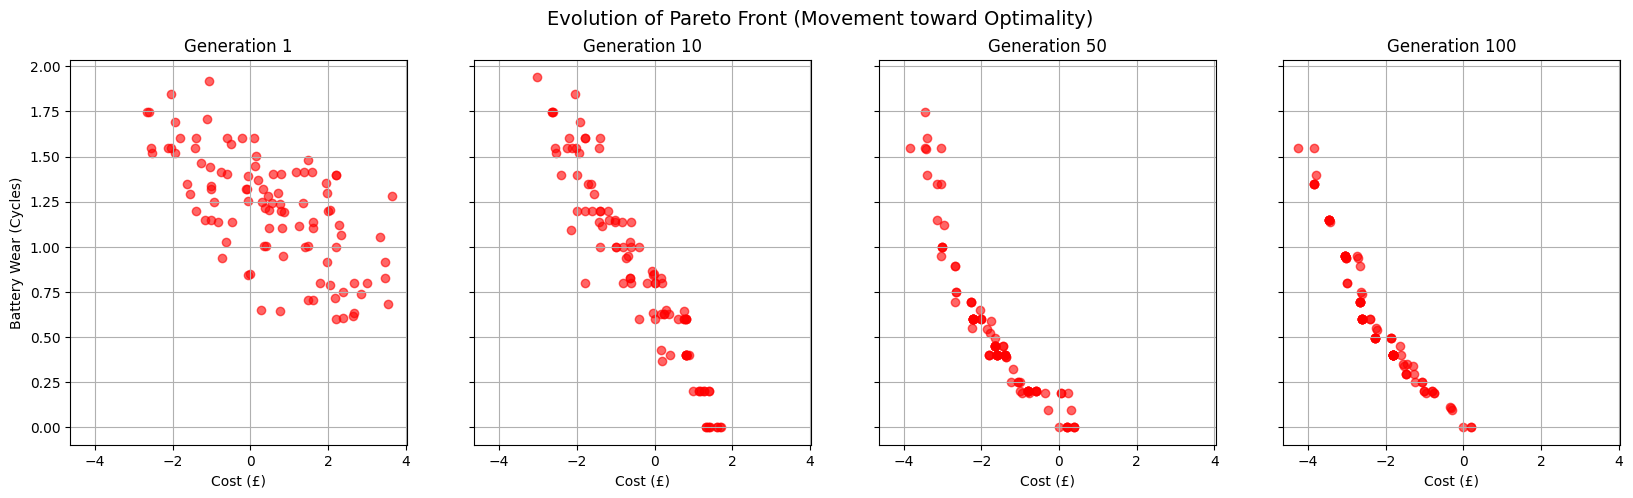

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.patches import Patch
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import joblib
import copy

# GA Imports
import pygad

# NSGA-II Imports
from pymoo.core.problem import ElementwiseProblem
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.operators.crossover.sbx import SBX
from pymoo.operators.mutation.pm import PM
from pymoo.operators.sampling.rnd import IntegerRandomSampling
from pymoo.operators.repair.rounding import RoundingRepair
from pymoo.optimize import minimize
from pymoo.indicators.hv import Hypervolume

# ==========================================
# 1. HELPER CLASSES (Physics Engines)
# ==========================================

class BatteryProblem(ElementwiseProblem):
    """
    Updated Physics Engine: 'Smart Guardrails'
    Instead of penalties, we just block invalid moves physically.
    This prevents the AI from getting scared of full batteries.
    """
    def __init__(self, solar_data, prices):
        self.solar = solar_data
        self.prices = prices
        self.capacity = 13.5
        # We still have 2 objectives: Cost and Wear (Cycles)
        super().__init__(n_var=24, n_obj=2, n_ieq_constr=0, xl=0, xu=2)

    def _evaluate(self, x, out, *args, **kwargs):
        actions = np.round(x).astype(int)
        battery = 0
        cost = 0
        cycles = 0
        # No 'penalty' variable needed anymore!

        for h, action in enumerate(actions):
            # 1. Solar fills battery (Capped at capacity)
            gen = self.solar[h]
            battery = min(battery + gen, self.capacity)
            price = self.prices[h]

            # 2. AI Logic (Safe Mode)
            if action == 1:
                # Check how much empty space is left
                empty_space = self.capacity - battery

                # Only charge what fits. If full, charge 0. DO NOT PENALIZE.
                actual_charge = min(2, empty_space)

                battery += actual_charge
                cost += actual_charge * price

            elif action == 2: # DISCHARGE
                # LOGIC CHANGE: Only discharge what we HAVE. Don't punish empty.
                available_energy = battery
                discharge_amount = min(2, available_energy) # If empty, sells 0.

                battery -= discharge_amount
                cost -= discharge_amount * price
                cycles += discharge_amount

        # Objectives: Minimize Cost, Minimize Cycles
        out["F"] = [cost, cycles/10]

# ==========================================
# 2. THE MASTER PIPELINE CLASS
# ==========================================
class MasterEnergyPipeline:
    def __init__(self):
        # Paths (Update if needed)
        self.data_path = "/content/drive/MyDrive/CI/cleaned_solar_data.csv"
        self.model_path = "/content/drive/MyDrive/CI/solar_brain_model.pkl"
        self.scaler_path = "/content/drive/MyDrive/CI/weather_scaler.pkl"

        # Load Components
        try:
            self.model = joblib.load(self.model_path)
            self.scaler = joblib.load(self.scaler_path)
            print("[Init] Model and Scaler loaded successfully.")
        except:
            print("[Error] Model not found. Please run the training script first.")

        self.prices = [0.10 if h < 7 else (0.50 if 17 <= h < 20 else 0.30) for h in range(24)]

    def calculate_stats(self, schedule, solar_gen): # <--- Added solar_gen
        """Helper to calculate Cost and Wear for any schedule, accounting for Solar."""
        battery = 0
        cost = 0
        cycles = 0

        for h, action in enumerate(schedule):
            # 1. Solar Inflow
            gen = solar_gen[h]
            battery = min(battery + gen, 13.5)

            price = self.prices[h]

            # 2. Apply Action
            if action == 1: # CHARGE
                room = 13.5 - battery
                amount = min(2, room)
                battery += amount
                cost += amount * price
                cycles += amount

            elif action == 2: # DISCHARGE
                amount = min(2, battery)
                battery -= amount
                cost -= amount * price
                cycles += amount

        return cost, cycles

    # ---------------------------------------------------------
    # PHASE 1: MODEL DIAGNOSTICS
    # ---------------------------------------------------------
    def run_model_diagnostics(self):
        print("\n--- PHASE 1: MODEL DIAGNOSTICS ---")
        df = pd.read_csv(self.data_path, parse_dates=['Date-Hour(NMT)'], index_col='Date-Hour(NMT)')
        X = df[['AirTemperature', 'RelativeAirHumidity', 'WindSpeed', 'Hour', 'Month']].values
        y = df['SystemProduction'].values

        _, X_test, _, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        X_test_scaled = self.scaler.transform(X_test)
        y_pred = np.maximum(self.model.predict(X_test_scaled), 0)

        r2 = r2_score(y_test, y_pred)
        print(f">> Model Accuracy (R2): {r2:.4f}")

        # Graph 1: Real vs Predicted
        plt.figure(figsize=(14, 5))
        limit = 100
        plt.plot(range(limit), y_test[:limit], label='Actual Solar', color='green', linewidth=2)
        plt.plot(range(limit), y_pred[:limit], label='AI Prediction', color='orange', linestyle='--', linewidth=2)
        plt.title(f"Model Performance: Real vs Predicted (R2: {r2:.2f})")
        plt.xlabel("Test Samples (Hours)"); plt.ylabel("Energy (kWh)")
        plt.legend(); plt.grid(True)
        plt.show() #

        # Graph 2: Scatter
        plt.figure(figsize=(6, 6))
        plt.scatter(y_test, y_pred, alpha=0.3, color='purple')
        plt.plot([0, y_test.max()], [0, y_test.max()], 'r--', label='Perfect Fit')
        plt.title("Prediction Accuracy Scatter Plot")
        plt.xlabel("Actual Energy"); plt.ylabel("Predicted Energy")
        plt.legend(); plt.grid(True)
        plt.show() #

    # ---------------------------------------------------------
    # PHASE 2: SIMULATION SETUP
    # ---------------------------------------------------------
    def setup_simulation_day(self):
        print("\n--- PHASE 2: SIMULATION SETUP ---")
        df = pd.read_csv(self.data_path)
        # random_idx = np.random.randint(0, len(df) - 24)
        random_idx = 1026 #for testing
        weather = df.iloc[random_idx : random_idx+24][['AirTemperature', 'RelativeAirHumidity', 'WindSpeed', 'Hour', 'Month']]

        scaled_weather = self.scaler.transform(weather.values)
        solar_gen = np.maximum(self.model.predict(scaled_weather), 0)

        print(f">> Selected Day Index: {random_idx}")
        print(f">> Forecasted Total Solar: {np.sum(solar_gen):.2f} kWh")
        return solar_gen

    # ---------------------------------------------------------
    # PHASE 3: SINGLE OBJECTIVE (RL-ADAPTIVE) - UPDATED
    # ---------------------------------------------------------
    def run_single_objective(self, solar_gen):
        print("\n--- PHASE 3: SINGLE OBJECTIVE OPTIMIZATION (RL-CONTROLLED) ---")

        # Initialize the Brain
        rl_agent = RLHyperParameterTuner()

        # Metrics Storage
        self.ga_diversity_history = []
        self.ga_fitness_history = []
        self.mutation_history = [] # Track what the AI chose

        def on_gen(ga_instance):
            # 1. Get Metrics (Inputs)
            # Calculate diversity (Standard Deviation of Fitness)
            pop_fitness = ga_instance.last_generation_fitness
            diversity = np.std(pop_fitness)
            best_fitness = np.max(pop_fitness)

            self.ga_diversity_history.append(diversity)
            self.ga_fitness_history.append(best_fitness)

            # 2. Ask the RL Agent for the best Mutation Rate
            new_mutation_rate = rl_agent.decide_mutation_rate(diversity, best_fitness)

            # 3. Apply the Decision
            ga_instance.mutation_probability = new_mutation_rate
            self.mutation_history.append(new_mutation_rate)

            # Optional: Print to see it thinking
            # print(f"Gen {ga_instance.generations_completed}: Div={diversity:.4f} -> RL chose Mut={new_mutation_rate}")

        def fitness_func(ga, solution, idx):
            batt=0; cost=0; pen=0
            for h, act in enumerate(solution):
                if act==1:
                    if batt+2<=13.5: batt+=2; cost+=2*self.prices[h]
                    else: pen+=50
                elif act==2:
                    if batt-2>=0: batt-=2; cost-=2*self.prices[h]
                    else: pen+=50
            return 1.0/(cost+pen+1000)

        # Run GA
        ga = pygad.GA(num_generations=50, num_parents_mating=5, fitness_func=fitness_func,
                      sol_per_pop=50, num_genes=24, gene_type=int, gene_space=[0,1,2],
                      keep_elitism=2,
                      mutation_probability=0.1, # Initial Guess
                      on_generation=on_gen)     # Hook in the RL Agent
        ga.run()
        best_sol, _, _ = ga.best_solution()

        # Visualize the AI's Decisions
        plt.figure(figsize=(10, 3))
        plt.plot(self.mutation_history, 'r-o', label='RL Selected Mutation Rate')
        plt.title("Reinforcement Learning Control: Adapting Mutation Rate Live")
        plt.ylabel("Mutation Rate"); plt.xlabel("Generation")
        plt.legend(); plt.grid(True); plt.show() #

        cost, wear = self.calculate_stats(best_sol, solar_gen)
        self.visualize_operational_report(best_sol, solar_gen, f"Single-Objective (RL-Adaptive)\nCost: £{cost:.2f}")
        return best_sol
    # ---------------------------------------------------------
    # PHASE 4: MULTI OBJECTIVE (RL-ADAPTIVE)
    # ---------------------------------------------------------
    def run_multi_objective(self, solar_gen):
        print("\n--- PHASE 4: MULTI OBJECTIVE (RL-CONTROLLED) ---")

        # 1. Setup Environment
        problem = BatteryProblem(solar_gen, self.prices)
        ref_point = np.array([100.0, 100.0])
        ind = Hypervolume(ref_point=ref_point)

        # Initialize RL Agent
        rl_agent = RLHyperParameterTuner()
        mutation_history = []
        hv_history = []

        # Reset History for Advanced Plots
        self.nsga_history = []

        # 2. Setup NSGA-II
        algorithm = NSGA2(pop_size=100, n_offsprings=50, sampling=IntegerRandomSampling(),
                          crossover=SBX(prob=0.9, eta=15, repair=RoundingRepair()),
                          mutation=PM(prob=0.1, eta=20, repair=RoundingRepair()),
                          eliminate_duplicates=True)

        algorithm.setup(problem, seed=1)

        print(">> Starting Adaptive Evolution Loop...")

        # 3. Manual Generation Loop (RL-Controlled)
        for gen in range(100):
            algorithm.next()

            # Save History for Advanced Plots
            self.nsga_history.append(copy.deepcopy(algorithm))

            # RL Logic: Calculate Metrics
            pop = algorithm.pop
            opt = pop[pop.get("rank") == 0]
            current_hv = ind(opt.get("F"))
            hv_history.append(current_hv)

            costs = pop.get("F")[:, 0]
            diversity = np.std(costs)

            # RL Agent decides Mutation Rate
            new_mut_rate = rl_agent.decide_mutation_rate(diversity, current_hv)
            mutation_history.append(new_mut_rate)
            algorithm.mating.mutation.prob = new_mut_rate

            if gen % 10 == 0:
                print(f"   Gen {gen}: HV={current_hv:.2f} | RL Set Mutation={new_mut_rate}")

        # 4. Visualization of RL Logic
        fig, ax1 = plt.subplots(figsize=(10, 4))
        ax1.set_xlabel('Generation')
        ax1.set_ylabel('Hypervolume', color='tab:blue')
        ax1.plot(hv_history, color='tab:blue', label='Hypervolume')
        ax1.grid(True, alpha=0.3)

        ax2 = ax1.twinx()
        ax2.set_ylabel('Mutation Rate', color='tab:red')
        ax2.step(range(len(mutation_history)), mutation_history, color='tab:red', linestyle='--', alpha=0.5)
        plt.title("Adaptive NSGA-II: RL Agent Logic")
        plt.show() #

        # 5. Extract Best Solution (SMART SELECTION LOGIC)
        res = algorithm.result()
        all_costs = res.F[:, 0]
        all_wear = res.F[:, 1]

        best_idx = -1
        best_cost = 99999

        wear_limit = 40.0 

        valid_indices = [
            i for i, w in enumerate(all_wear)
            if w <= wear_limit and all_costs[i] < -0.01  
        ]

        if len(valid_indices) > 0:
            # Pick the richest survivor
            for idx in valid_indices:
                if all_costs[idx] < best_cost:
                    best_cost = all_costs[idx]
                    best_idx = idx
            print(f">> Success: Found PROFITABLE strategy! Profit: £{-best_cost:.2f} | Wear: {all_wear[best_idx]:.1f} kWh")
        else:
            # Fallback: If everyone is a loser, pick the one who lost the LEAST money
            print(">> Warning: No profitable strategies found (Try increasing generations). Picking least worst option.")
            best_idx = np.argmin(all_costs)

        best_sol = np.round(res.X[best_idx]).astype(int)

        # 6. Final Reporting
        cost, wear = self.calculate_stats(best_sol, solar_gen)
        self.visualize_operational_report(best_sol, solar_gen, f"Multi-Objective (RL-Adaptive)\nCost: £{cost:.2f} | Wear: {wear:.1f} kWh")
        # self.print_explicit_schedule(best_sol, solar_gen,"Multi-Objective RL (Smart Balanced)")

        return best_sol
    # ---------------------------------------------------------
    # VISUALIZATION ENGINE
    # ---------------------------------------------------------
    def visualize_operational_report(self, schedule, solar_gen, title):
        battery_level = [0]; curr = 0
        for act in schedule:
            if act==1: curr = min(curr+2, 13.5)
            elif act==2: curr = max(curr-2, 0)
            battery_level.append(curr)

        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), gridspec_kw={'height_ratios': [3, 1]}, sharex=True)
        plt.subplots_adjust(hspace=0.1)

        # Top Panel
        ax1.fill_between(range(25), battery_level, color='#1f77b4', alpha=0.4)
        ax1.plot(range(25), battery_level, color='#1f77b4', linewidth=2)
        ax1.set_ylabel('Battery (kWh)', color='blue')
        ax1.set_ylim(0, 15); ax1.grid(True, alpha=0.3)
        ax1.set_title(f"Operational Report: {title}", fontweight='bold')

        ax1_twin = ax1.twinx()
        ax1_twin.step(range(24), self.prices, where='mid', color='red', linestyle='--')
        ax1_twin.set_ylabel('Price', color='red'); ax1_twin.set_ylim(0, 0.6)

        ax1_tri = ax1.twinx()
        ax1_tri.spines["right"].set_position(("axes", 1.1))
        ax1_tri.plot(range(24), solar_gen, color='orange', label='Solar')
        ax1_tri.set_ylabel('Solar', color='orange')

        # Bottom Panel (Traffic Light)
        cmap = mcolors.ListedColormap(['lightgrey', '#2ca02c', '#d62728'])
        norm = mcolors.BoundaryNorm([-0.5, 0.5, 1.5, 2.5], cmap.N)
        ax2.imshow(np.array([schedule]), aspect='auto', cmap=cmap, norm=norm)
        ax2.set_yticks([]); ax2.set_xlabel("Hour of Day")

        legend_elements = [Patch(facecolor='lightgrey', label='Idle'), Patch(facecolor='#2ca02c', label='Charge'), Patch(facecolor='#d62728', label='Discharge')]
        ax2.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1, 1.3))
        plt.show()

    def compare_strategies(self, sched_A, sched_B, solar_gen): # <--- 1. Added solar_gen here
        print("\n--- PHASE 5: HEAD-TO-HEAD COMPARISON ---")

        # 2. Pass solar_gen to the calculator so it knows about free energy
        cost_A, wear_A = self.calculate_stats(sched_A, solar_gen)
        cost_B, wear_B = self.calculate_stats(sched_B, solar_gen)

        # 1. VISUAL COMPARISON STRIPS
        cmap = mcolors.ListedColormap(['lightgrey', '#2ca02c', '#d62728'])
        norm = mcolors.BoundaryNorm([-0.5, 0.5, 1.5, 2.5], cmap.N)

        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 4), sharex=True)

        ax1.set_title(f"Single Objective (Greedy)\nProfit: £{-cost_A:.2f} | Wear: {wear_A} kWh (High)", fontweight='bold', color='darkred')
        ax1.imshow(np.array([sched_A]), aspect='auto', cmap=cmap, norm=norm)
        ax1.set_yticks([])

        ax2.set_title(f"Multi Objective (Balanced)\nProfit: £{-cost_B:.2f} | Wear: {wear_B} kWh (Low)", fontweight='bold', color='darkgreen')
        ax2.imshow(np.array([sched_B]), aspect='auto', cmap=cmap, norm=norm)
        ax2.set_yticks([]); ax2.set_xlabel("Hour of Day")
        plt.show()

        # 2. BAR CHART COMPARISON
        labels = ['Single Obj (Greedy)', 'Multi Obj (Balanced)']
        costs = [-cost_A, -cost_B] # Profit (Negative cost)
        wears = [wear_A, wear_B]

        x = np.arange(len(labels))
        width = 0.35

        fig, ax = plt.subplots(figsize=(8, 5))
        rects1 = ax.bar(x - width/2, costs, width, label='Profit (£)', color='green')

        # Use a twin axis for Wear because the scale is different
        ax2 = ax.twinx()
        rects2 = ax2.bar(x + width/2, wears, width, label='Battery Wear (kWh)', color='grey')

        ax.set_ylabel('Profit (£)', color='green', fontweight='bold')
        ax2.set_ylabel('Battery Wear (kWh)', color='grey', fontweight='bold')
        ax.set_title('Final Verdict: Financial Gain vs. Hardware Damage')
        ax.set_xticks(x)
        ax.set_xticklabels(labels)

        # Add values on top
        ax.bar_label(rects1, padding=3, fmt='£%.2f')
        ax2.bar_label(rects2, padding=3, fmt='%.1f kWh')

        plt.show()
        # ---------------------------------------------------------
    # PHASE 6: ADVANCED ANALYSIS PLOTS (NEW!)
    # ---------------------------------------------------------
    def plot_advanced_analysis(self):
        print("\n--- PHASE 6: GENERATING SCIENTIFIC ANALYSIS PLOTS ---")

        # --- PLOT 1: CONVERGENCE (GA vs NSGA-II) ---
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

        # PyGAD Convergence (Fitness over time)
        ax1.plot(self.ga_fitness_history, color='blue', linewidth=2)
        ax1.set_title("Single-Objective Convergence (Fitness)")
        ax1.set_xlabel("Generation"); ax1.set_ylabel("Best Fitness (1/Cost)")
        ax1.grid(True)

        # NSGA-II Convergence (Hypervolume or Min Cost)
        # We track the minimum cost found in the population at each generation
        nsga_min_costs = [np.min(algo.pop.get("F")[:, 0]) for algo in self.nsga_history]
        ax2.plot(nsga_min_costs, color='red', linewidth=2)
        ax2.set_title("Multi-Objective Convergence (Min Cost)")
        ax2.set_xlabel("Generation"); ax2.set_ylabel("Minimum Cost Found")
        ax2.grid(True)
        plt.show() #

        # --- PLOT 2: POPULATION DIVERSITY (Exploration vs Exploitation) ---
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

        # PyGAD Diversity (Std Dev of Fitness)
        ax1.plot(self.ga_diversity_history, color='green', linestyle='--')
        ax1.set_title("Single-Obj Diversity (Fitness Std Dev)")
        ax1.set_xlabel("Generation"); ax1.set_ylabel("Diversity Metric")
        ax1.fill_between(range(len(self.ga_diversity_history)), self.ga_diversity_history, color='green', alpha=0.1)
        ax1.grid(True)

        # NSGA-II Diversity (Spread of Objective Space)
        # Calculate standard deviation of Costs in the population per generation
        nsga_diversity = [np.std(algo.pop.get("F")[:, 0]) for algo in self.nsga_history]
        ax2.plot(nsga_diversity, color='purple', linestyle='--')
        ax2.set_title("Multi-Obj Diversity (Cost Spread)")
        ax2.set_xlabel("Generation"); ax2.set_ylabel("Diversity Metric")
        ax2.fill_between(range(len(nsga_diversity)), nsga_diversity, color='purple', alpha=0.1)
        ax2.grid(True)
        plt.show() #

        # --- PLOT 3: EVOLUTION OF SOLUTIONS (Objective Space) ---
        # Only relevant for Multi-Objective to show the Pareto Front moving
        print("Generating Evolution Animation Frame...")

        generations_to_plot = [0, 9, 49, 99] # Plot Start, Early, Mid, End
        fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharex=True, sharey=True)

        for i, gen_idx in enumerate(generations_to_plot):
            if gen_idx < len(self.nsga_history):
                pop_F = self.nsga_history[gen_idx].pop.get("F")
                ax = axes[i]
                ax.scatter(pop_F[:, 0], pop_F[:, 1], color='red', alpha=0.6)
                ax.set_title(f"Generation {gen_idx+1}")
                ax.set_xlabel("Cost (£)");
                if i == 0: ax.set_ylabel("Battery Wear (Cycles)")
                ax.grid(True)

        plt.suptitle("Evolution of Pareto Front (Movement toward Optimality)", fontsize=14)
        plt.show()
    def run_pipeline(self):
        self.run_model_diagnostics()
        solar = self.setup_simulation_day()
        sched_single = self.run_single_objective(solar)
        sched_multi = self.run_multi_objective(solar)
        self.compare_strategies(sched_single, sched_multi, solar)
        self.plot_advanced_analysis()


# ==========================================
# MAIN RUN
# ==========================================
if __name__ == "__main__":
    pipeline = MasterEnergyPipeline()
    pipeline.run_pipeline()


--- TEST 2: WEATHER STRESS TEST (SUMMER VS WINTER) ---

Running Optimization for: Summer (High Solar)
>> Profit in Summer (High Solar): £6.00

Running Optimization for: Winter (Low Solar)
>> Profit in Winter (Low Solar): £2.96


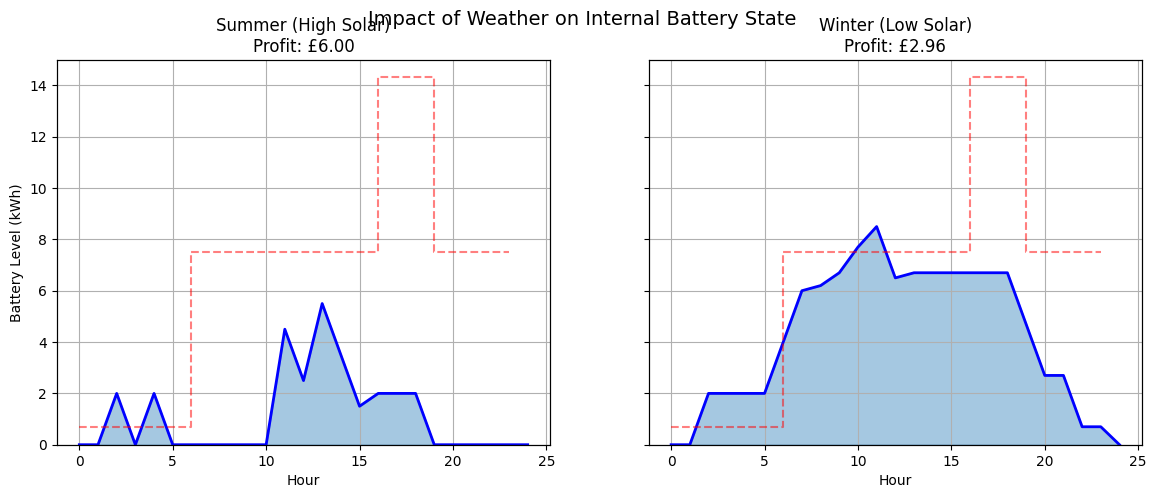

In [ ]:
class SensitivityLab:
    def __init__(self, pipeline):
        self.pipe = pipeline
        self.model = pipeline.model
        self.scaler = pipeline.scaler

    # ==========================================
    # TEST 2: WEATHER STRESS TEST (IMPROVED VISUALS)
    # Question: "Does the Battery fill differently in Summer vs Winter?"
    # ==========================================
    def test_weather_robustness(self):
        print("\n--- TEST 2: WEATHER STRESS TEST (SUMMER VS WINTER) ---")

        # Summer: High Solar (Peak ~4kW)
        summer_solar = np.array([0,0,0,0,0,0.5,1.5,3,4,4.5,4.5,4,3,2,1,0.5,0,0,0,0,0,0,0,0])
        # Winter: Low Solar (Peak ~1kW)
        winter_solar = np.array([0,0,0,0,0,0,0,0.2,0.5,1,0.8,0.5,0.2,0,0,0,0,0,0,0,0,0,0,0])

        days = {'Summer (High Solar)': summer_solar, 'Winter (Low Solar)': winter_solar}

        # Create a shared figure for side-by-side comparison
        fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

        for i, (name, solar) in enumerate(days.items()):
            print(f"\nRunning Optimization for: {name}")

            # Run NSGA-II
            problem = BatteryProblem(solar, self.pipe.prices)
            algorithm = NSGA2(pop_size=50, n_offsprings=20, sampling=IntegerRandomSampling(),
                              crossover=SBX(prob=0.9, repair=RoundingRepair()),
                              mutation=PM(prob=0.05, repair=RoundingRepair()), eliminate_duplicates=True)

            res = minimize(problem, algorithm, ('n_gen', 50), seed=1, verbose=False)

            # Get Best Strategy
            costs = res.F[:, 0]
            best_idx = np.argmin(costs)
            best_sched = res.X[best_idx]
            best_profit = -costs[best_idx]

            print(f">> Profit in {name}: £{best_profit:.2f}")

            # CALCULATE BATTERY LEVEL FOR PLOTTING
            battery_level = [0]
            curr = 0
            for h, act in enumerate(best_sched):
                # Physics Logic
                if act==1: curr = min(curr+2, 13.5)       # Charge from Grid
                elif act==2: curr = max(curr-2, 0)        # Discharge
                if act == 0:
                    curr = min(curr + solar[h], 13.5)

                battery_level.append(curr)

            # PLOT ON THE SHARED FIGURE
            ax = axes[i]
            ax.fill_between(range(25), battery_level, color='#1f77b4', alpha=0.4)
            ax.plot(range(25), battery_level, color='blue', linewidth=2)
            ax.set_title(f"{name}\nProfit: £{best_profit:.2f}")
            ax.set_xlabel("Hour");
            if i==0: ax.set_ylabel("Battery Level (kWh)")
            ax.set_ylim(0, 15); ax.grid(True)

            # Add Price Spikes overlay
            ax2 = ax.twinx()
            ax2.step(range(24), self.pipe.prices, color='red', linestyle='--', alpha=0.5)
            ax2.set_yticks([]) # Hide axis for cleanliness

        plt.suptitle("Impact of Weather on Internal Battery State", fontsize=14)
        plt.show()

# ==========================================
# RUN THE LAB
# ==========================================
if __name__ == "__main__":
    lab = SensitivityLab(pipeline)
    lab.test_weather_robustness()